# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla_{w} Q(w) = \frac{2}{l} X^T (X w - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [77]:
%autoreload 2

from tqdm.auto import tqdm
import numpy as np
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import LossFunction
from linear_regression import LinearRegression

In [7]:
%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set_theme(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


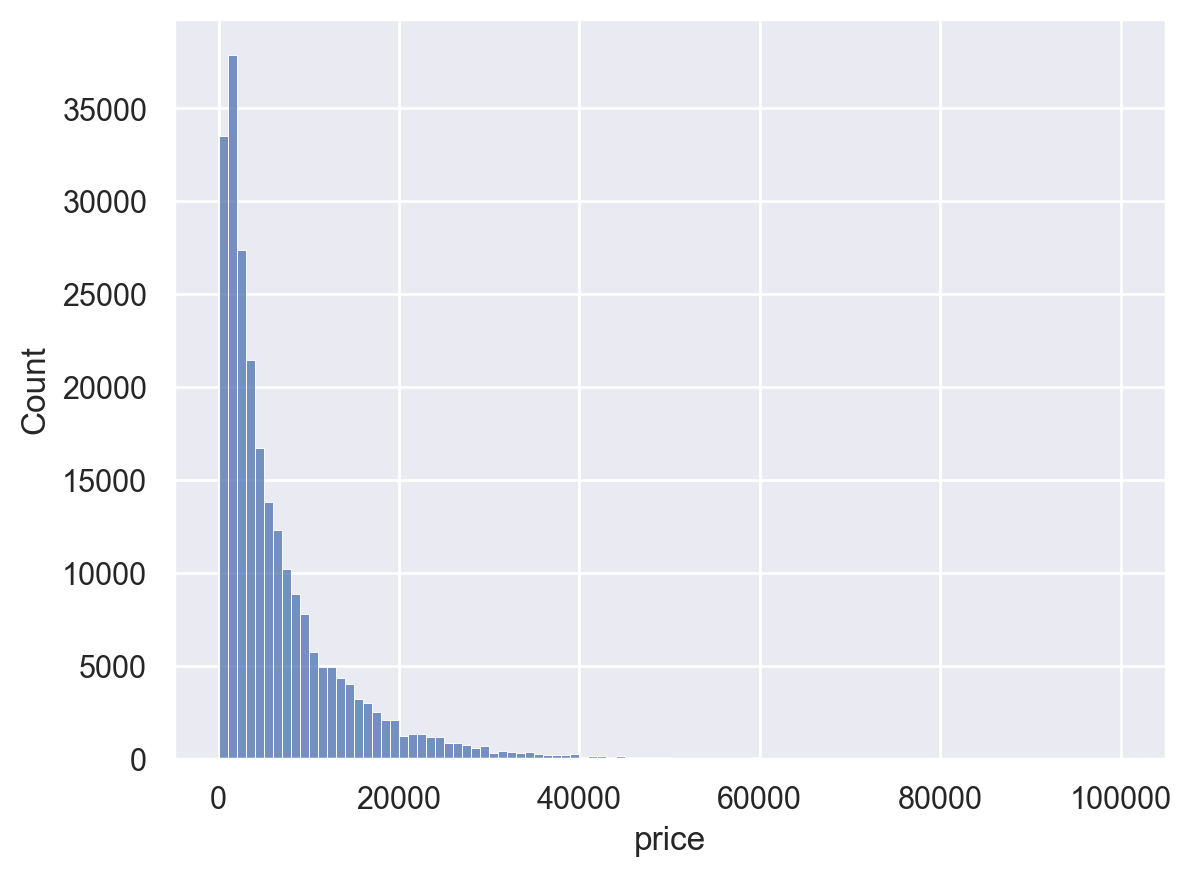

In [10]:
sns.histplot(data=data, x='price', bins=100);

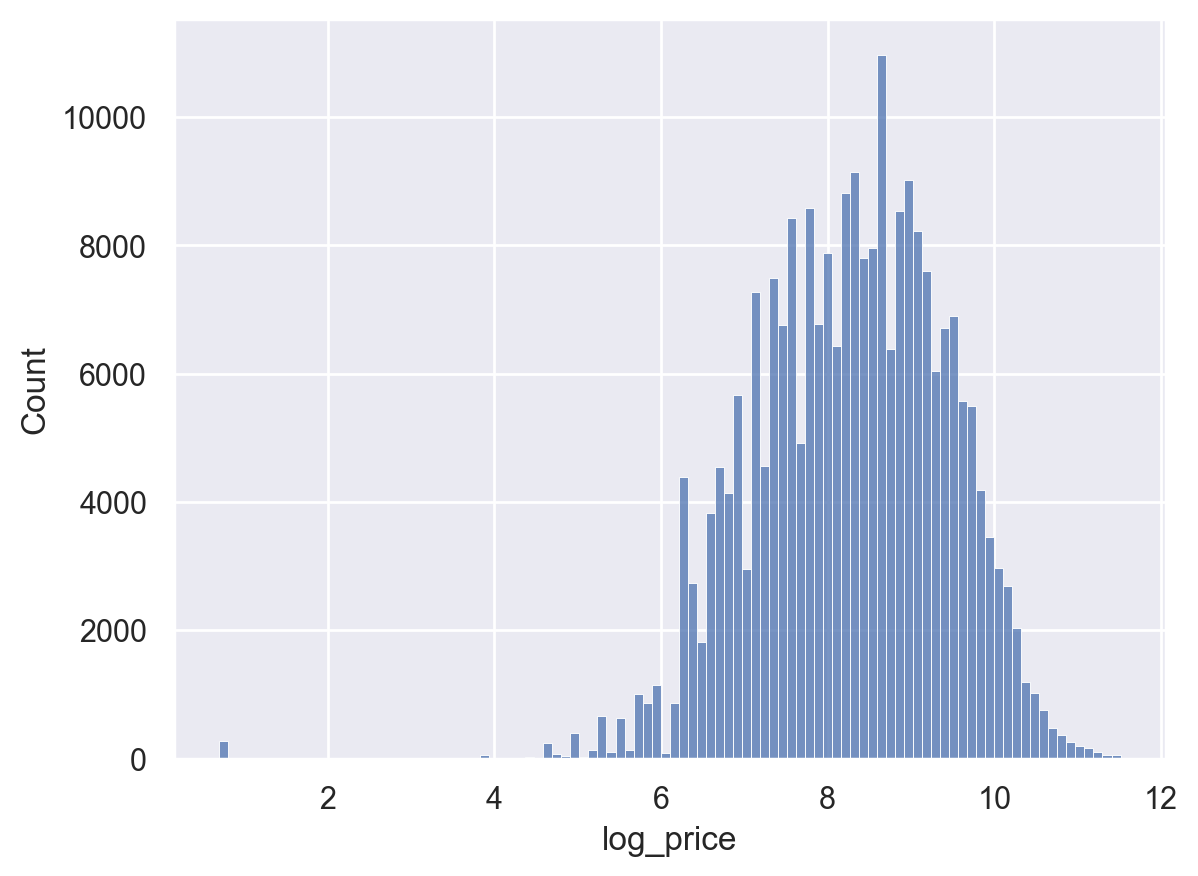

In [11]:
plot_data = data.copy()
plot_data['log_price'] = np.log1p(data['price'])
sns.histplot(data=plot_data, x='log_price', bins=100);

Логарифмирование позволило заметить ошибки в данных (автомобили продаются за 1 у.е.). Устраним выбросы в данных по правилу 3-х сигм

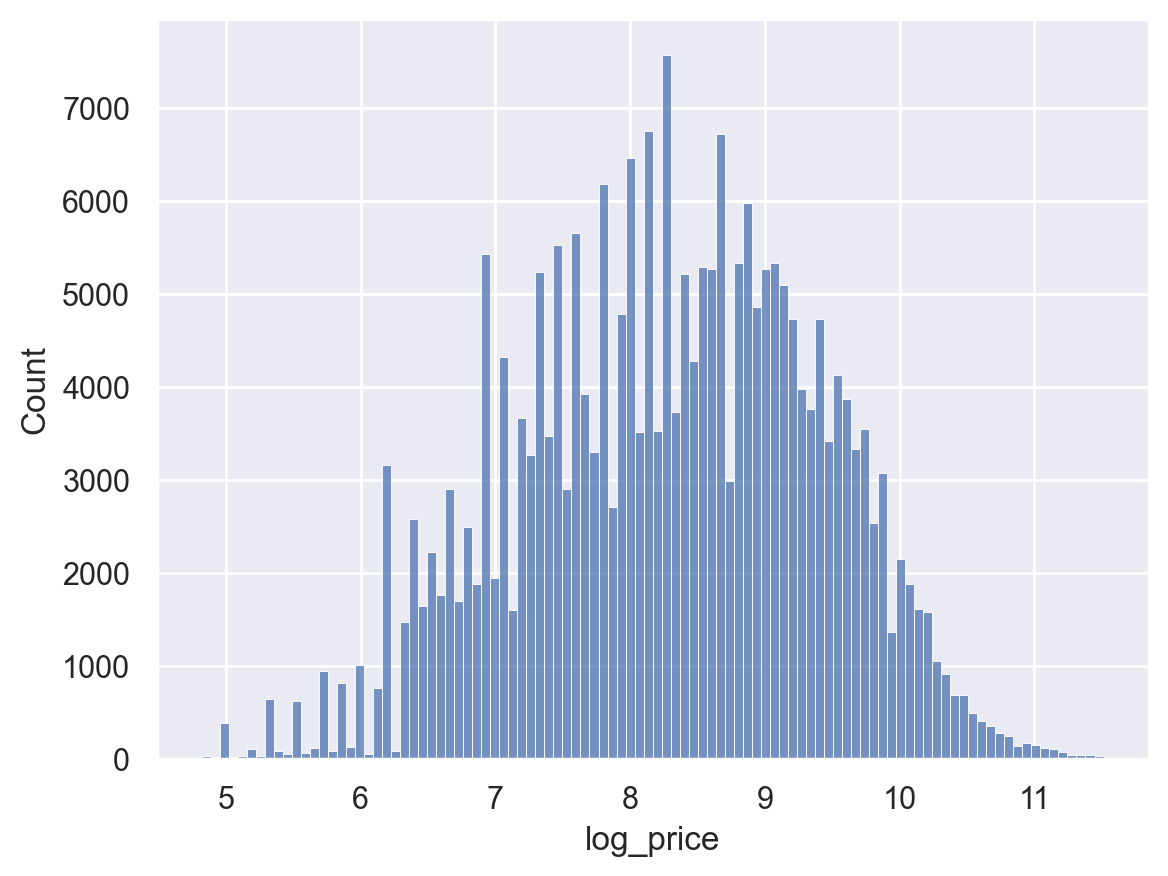

In [12]:
data['log_price'] = np.log1p(data['price'])
mean = data['log_price'].mean()
std = data['log_price'].std()
plot_data = data[np.abs(data['log_price'] - mean) <= 3 * std]
sns.histplot(data=plot_data, x='log_price', bins=100);

Распределение самой целевой переменной ассиметрчино и имеет длинный хвост, поэтому имеет смысл сделать логарфмирование, чтобы сделать распределение симметричным

In [13]:
data = data[np.abs(data['log_price'] - mean) <= 3 * std]

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [14]:
pd.set_option('future.no_silent_downcasting', True)
data['gearbox'] = data['gearbox'].replace({'manuell': 0, 'automatik': 1}).infer_objects(copy=False)
data['notRepairedDamage'] = data['notRepairedDamage'].replace({'nein': 0, 'ja': 1}).infer_objects(copy=False)

In [15]:
data['powerPS'] = data['powerPS'].astype(float)
data['autoAgeMonths'] = data['autoAgeMonths'].astype(float)

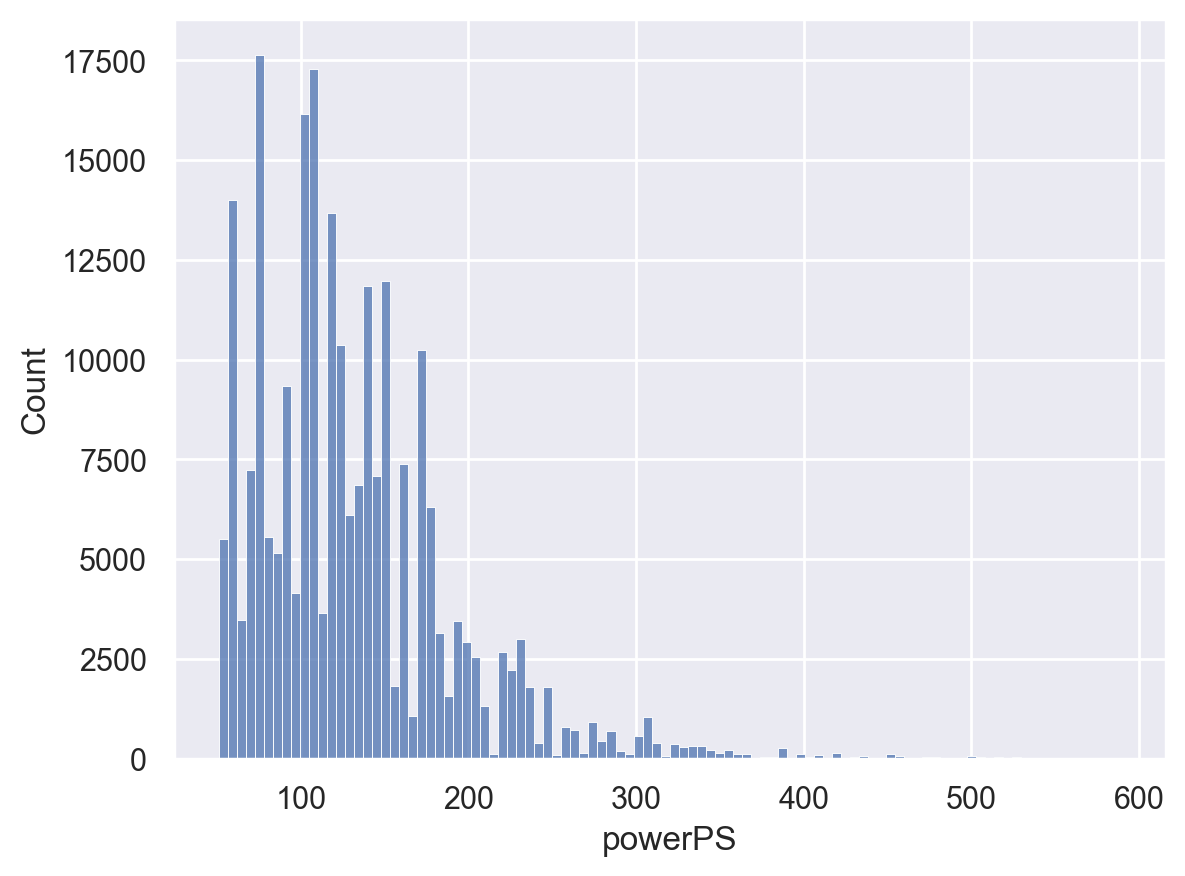

In [16]:
sns.histplot(data=data, x='powerPS', bins=100);

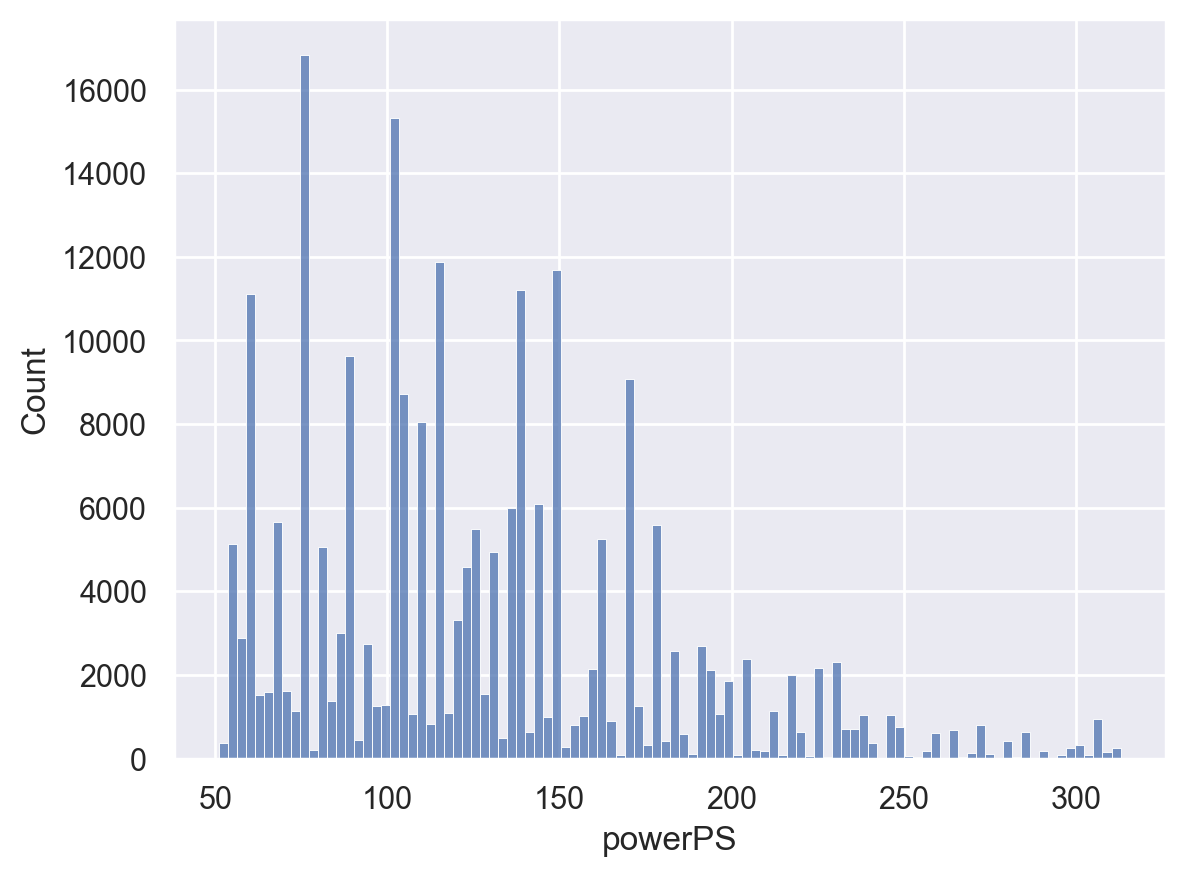

In [17]:
data = data[data['powerPS'] - data['powerPS'].mean() <= 3 * data['powerPS'].std()]
sns.histplot(data=data, x='powerPS', bins=100);

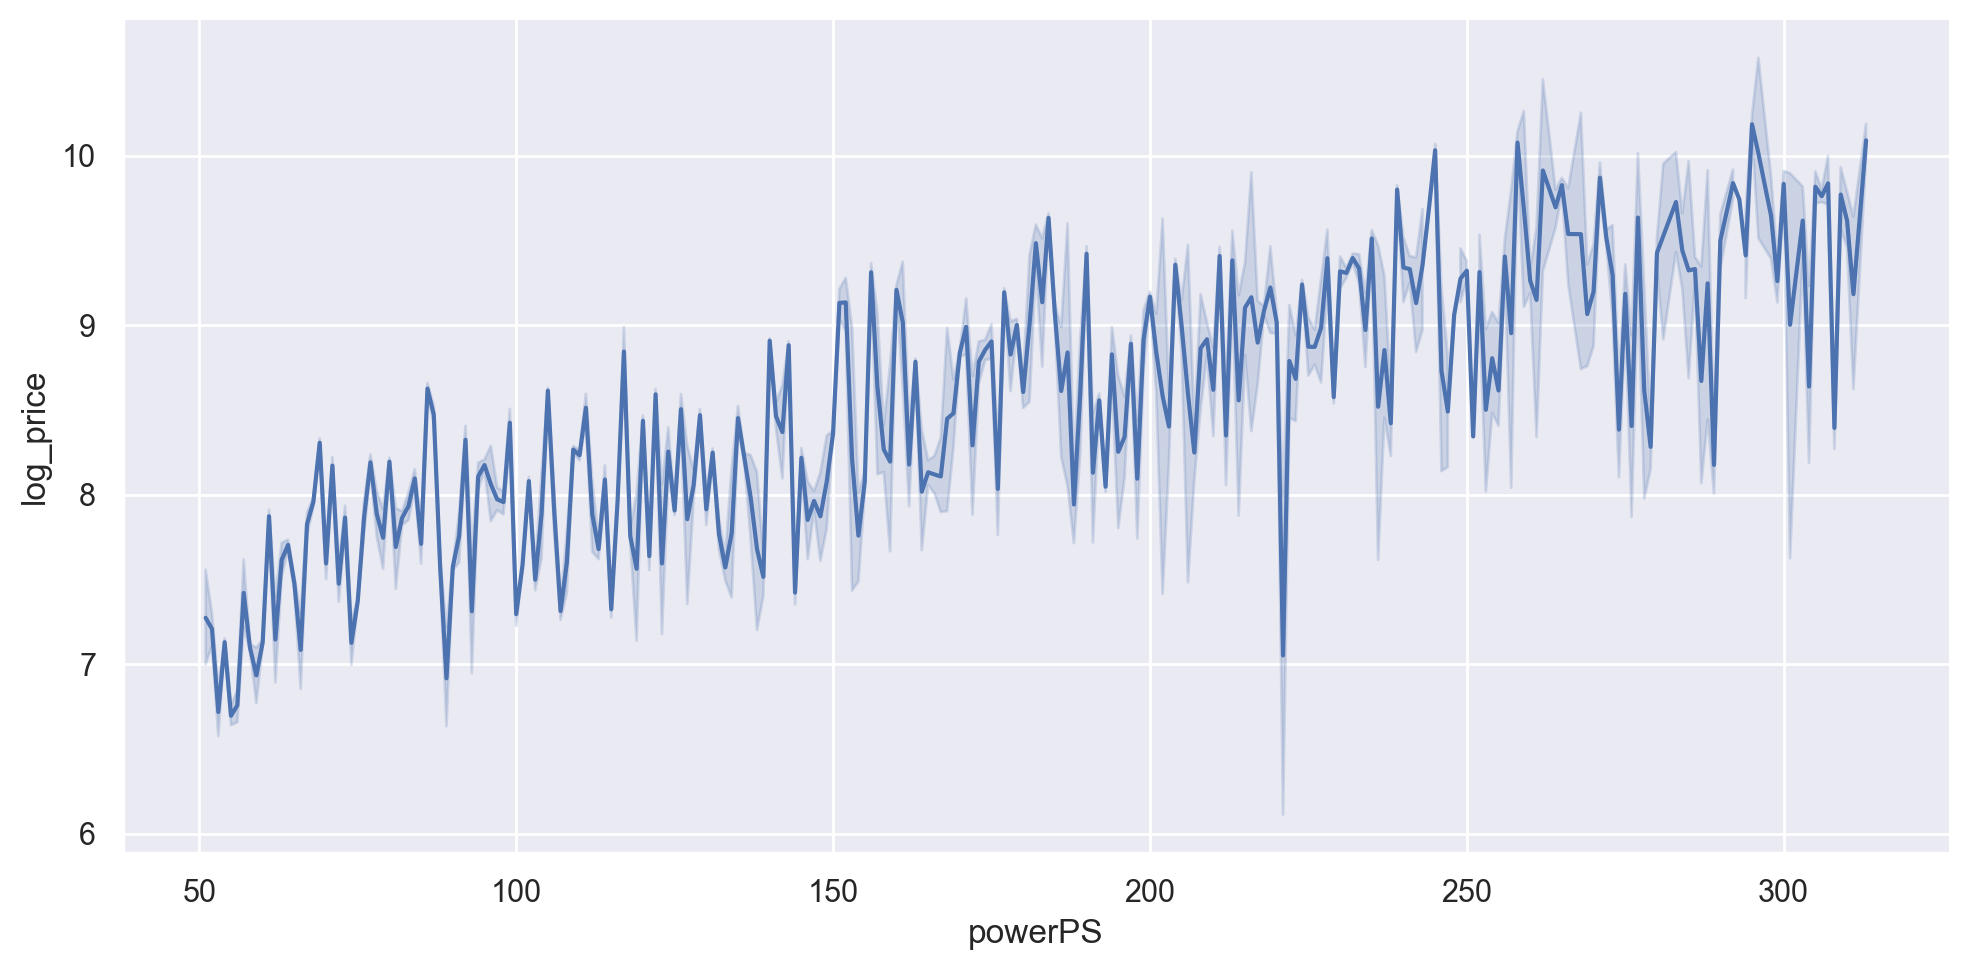

In [18]:
sns.relplot(data=data, x='powerPS', y='log_price', aspect=2, kind='line');

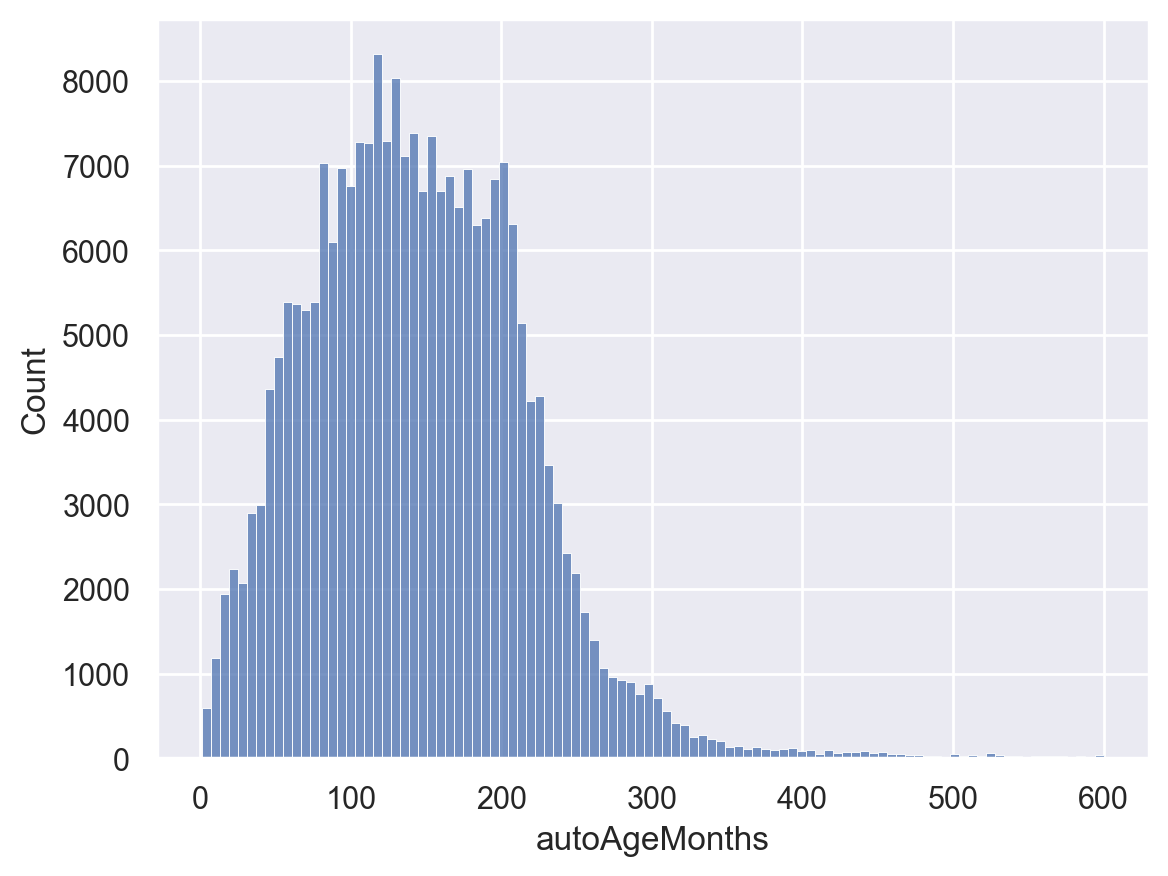

In [19]:
sns.histplot(data=data, x='autoAgeMonths', bins=100);

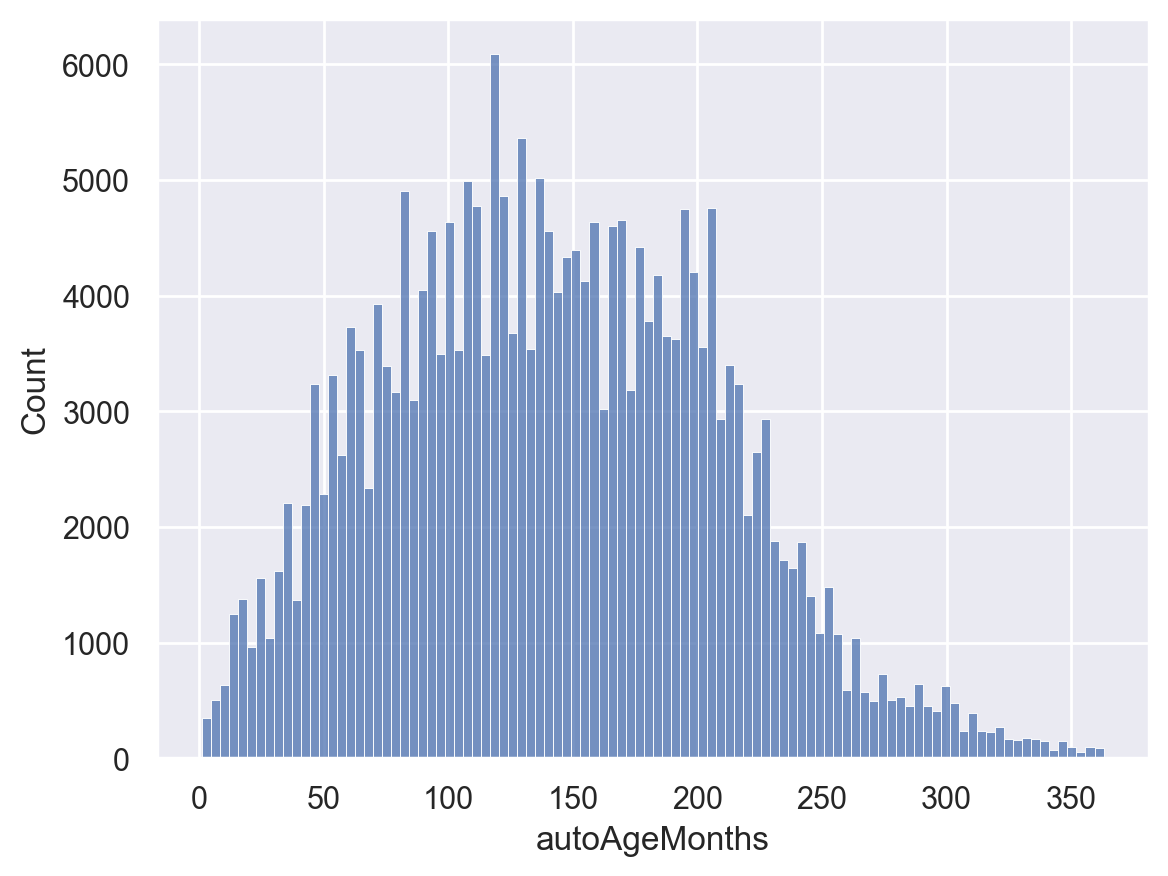

In [20]:
data = data[data['autoAgeMonths'] - data['autoAgeMonths'].mean() <= 3 * data['autoAgeMonths'].std()]
sns.histplot(data=data, x='autoAgeMonths', bins=100);

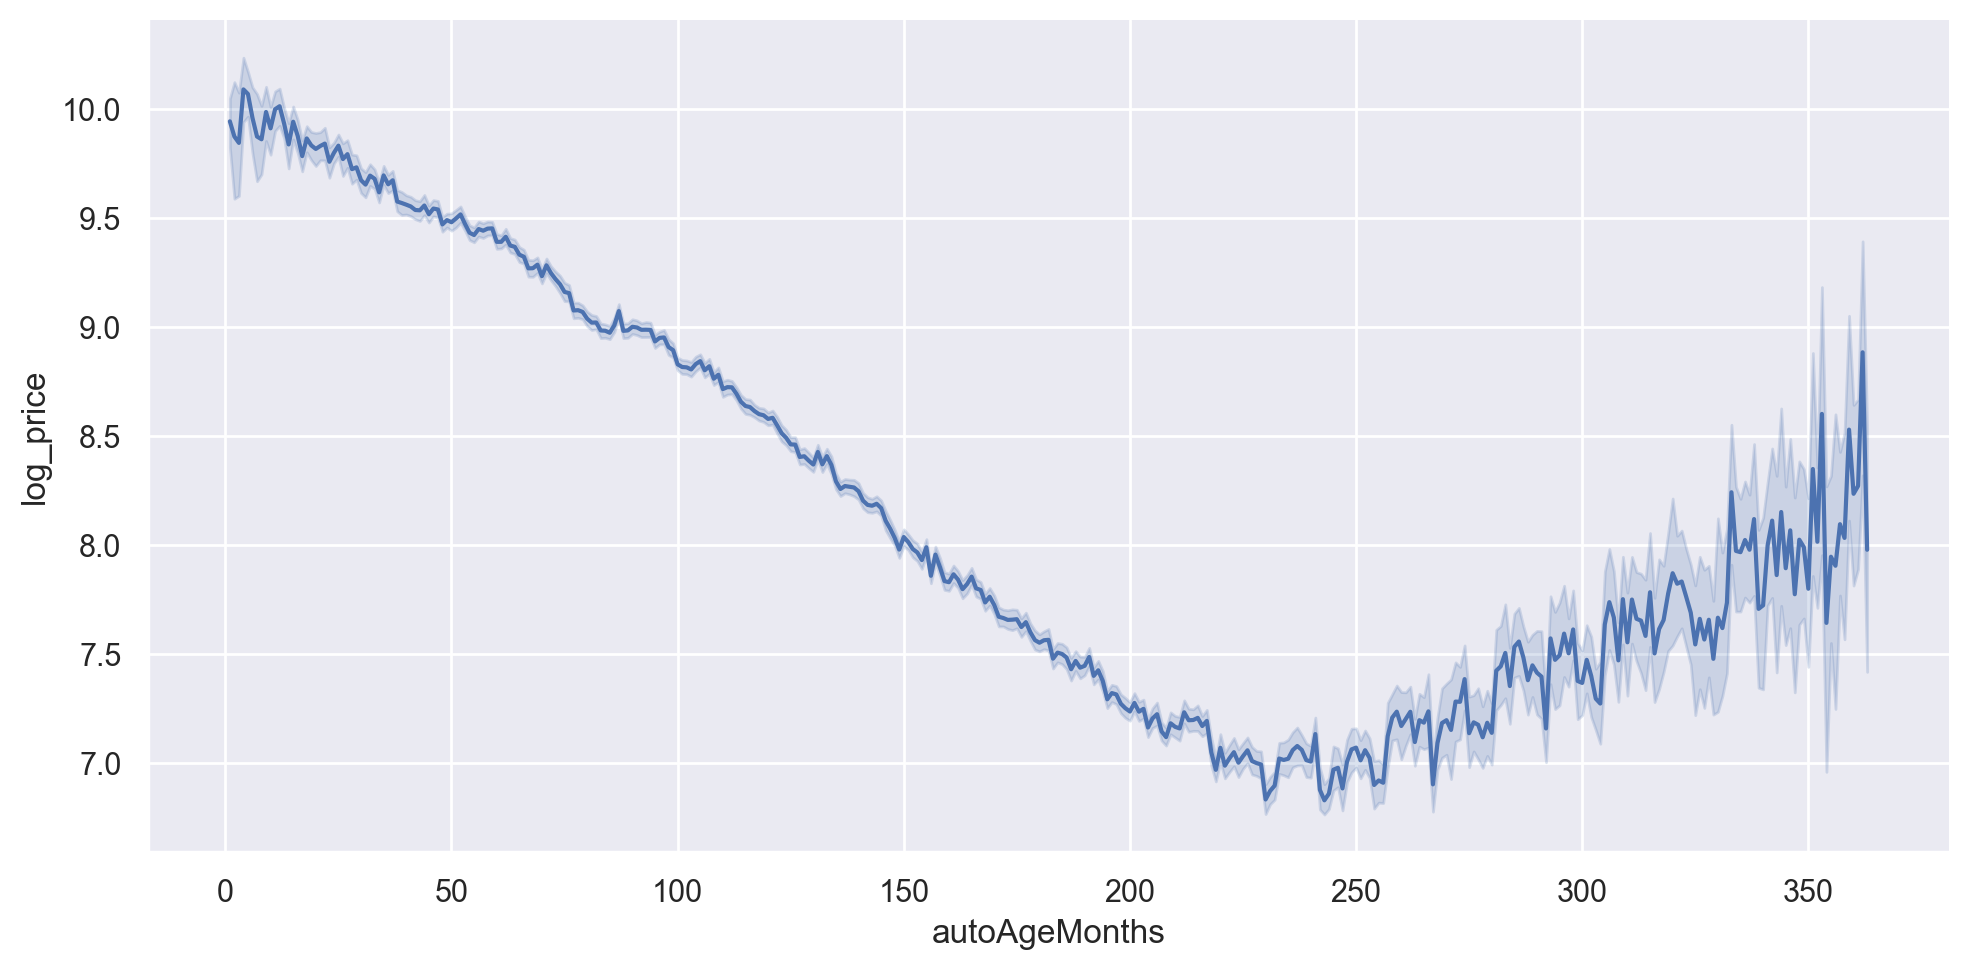

In [21]:
sns.relplot(data=data, x='autoAgeMonths', y='log_price', aspect=2, kind='line');

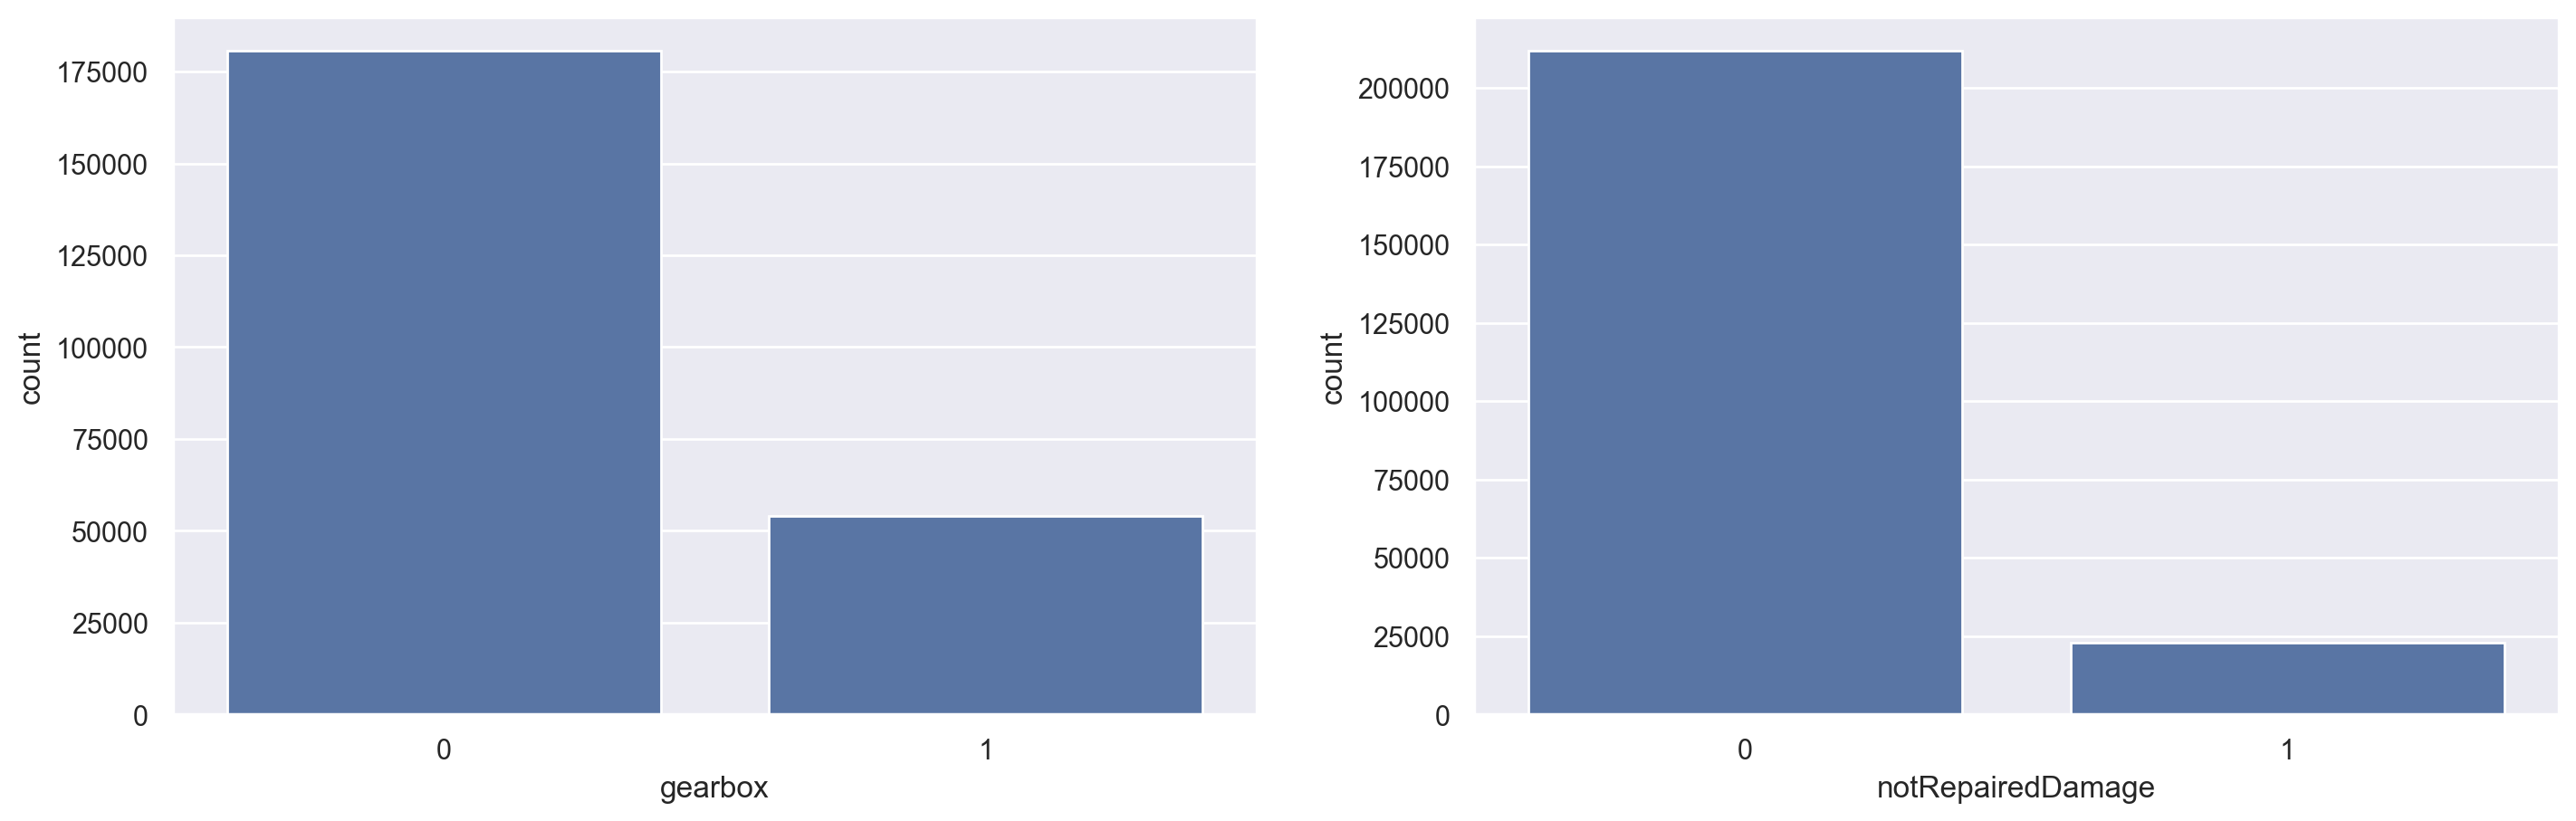

In [22]:
_, ax = plt.subplots(ncols=2, figsize=(17, 5))
sns.countplot(data=data, x='gearbox', ax=ax[0]);
sns.countplot(data=data, x='notRepairedDamage', ax=ax[1]);

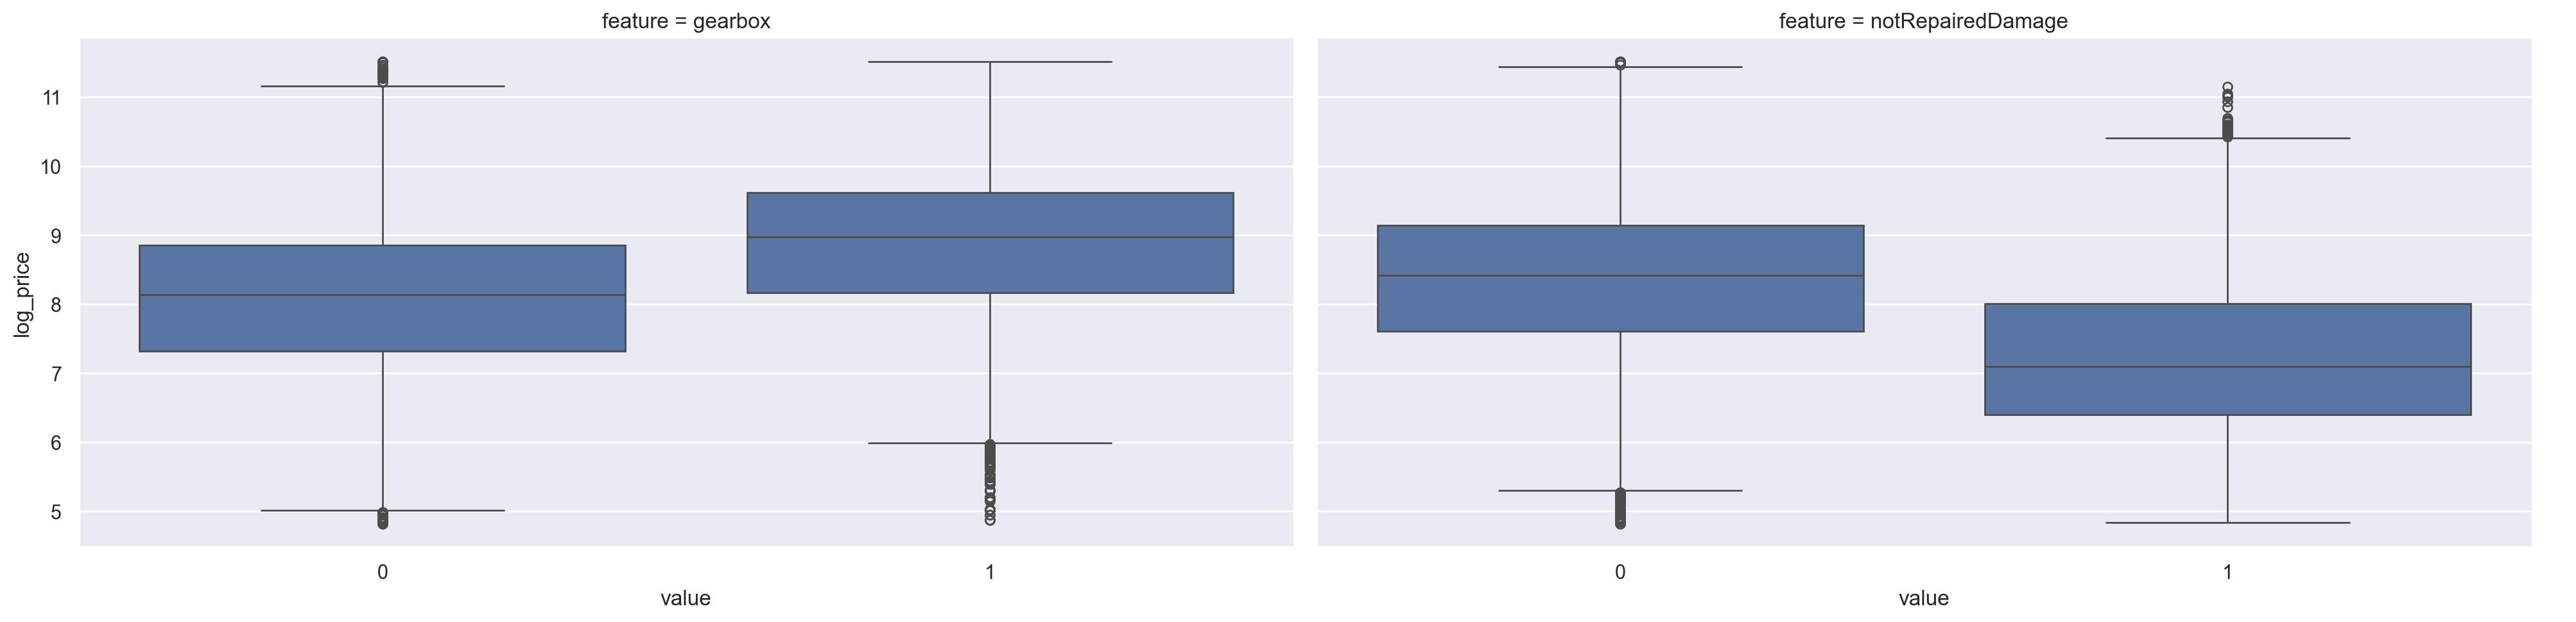

In [23]:
features = ['gearbox', 'notRepairedDamage']
plot_data = data.melt(id_vars=['log_price'], value_vars=features, 
                    var_name='feature', value_name='value')
sns.catplot(x='value', y='log_price', col='feature', 
            data=plot_data, kind='box', aspect=2)
plt.show();

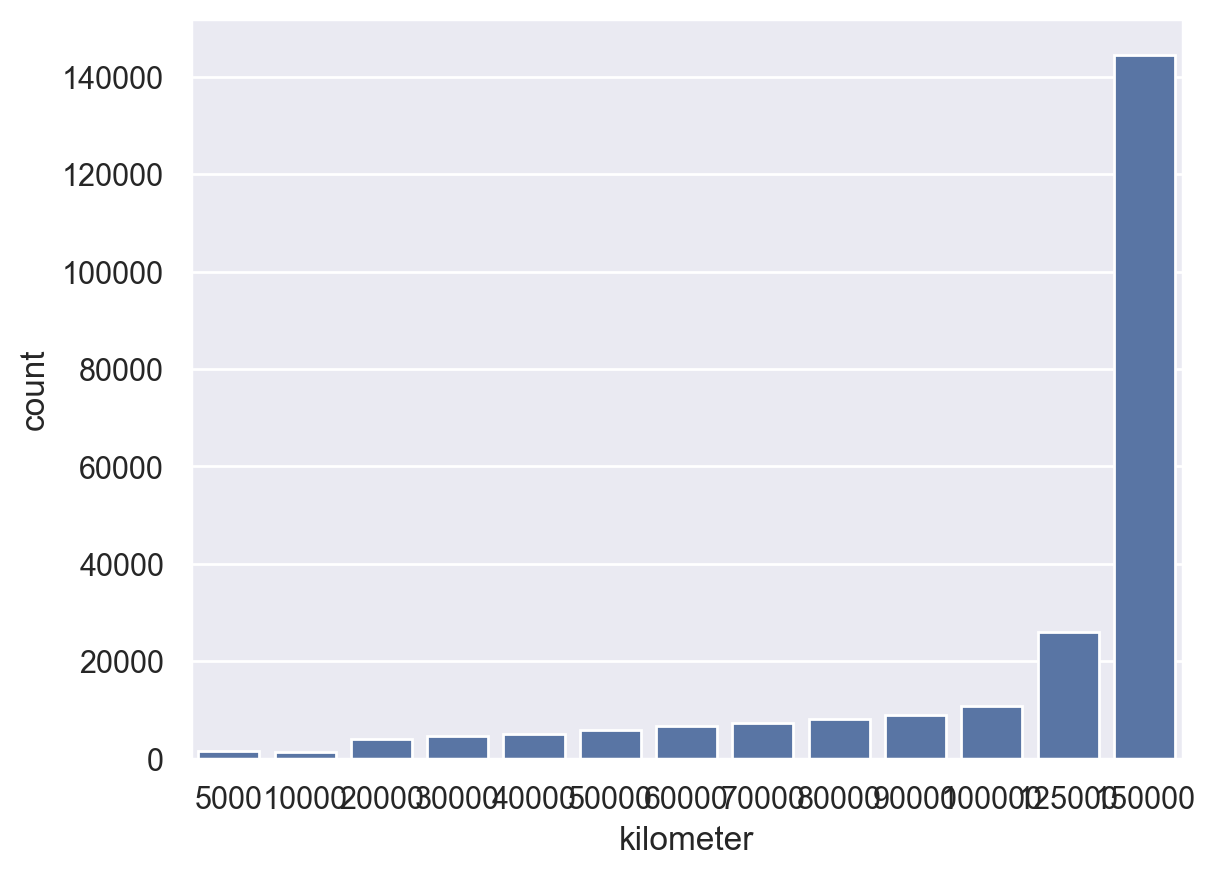

In [24]:
sns.countplot(data=data, x='kilometer');

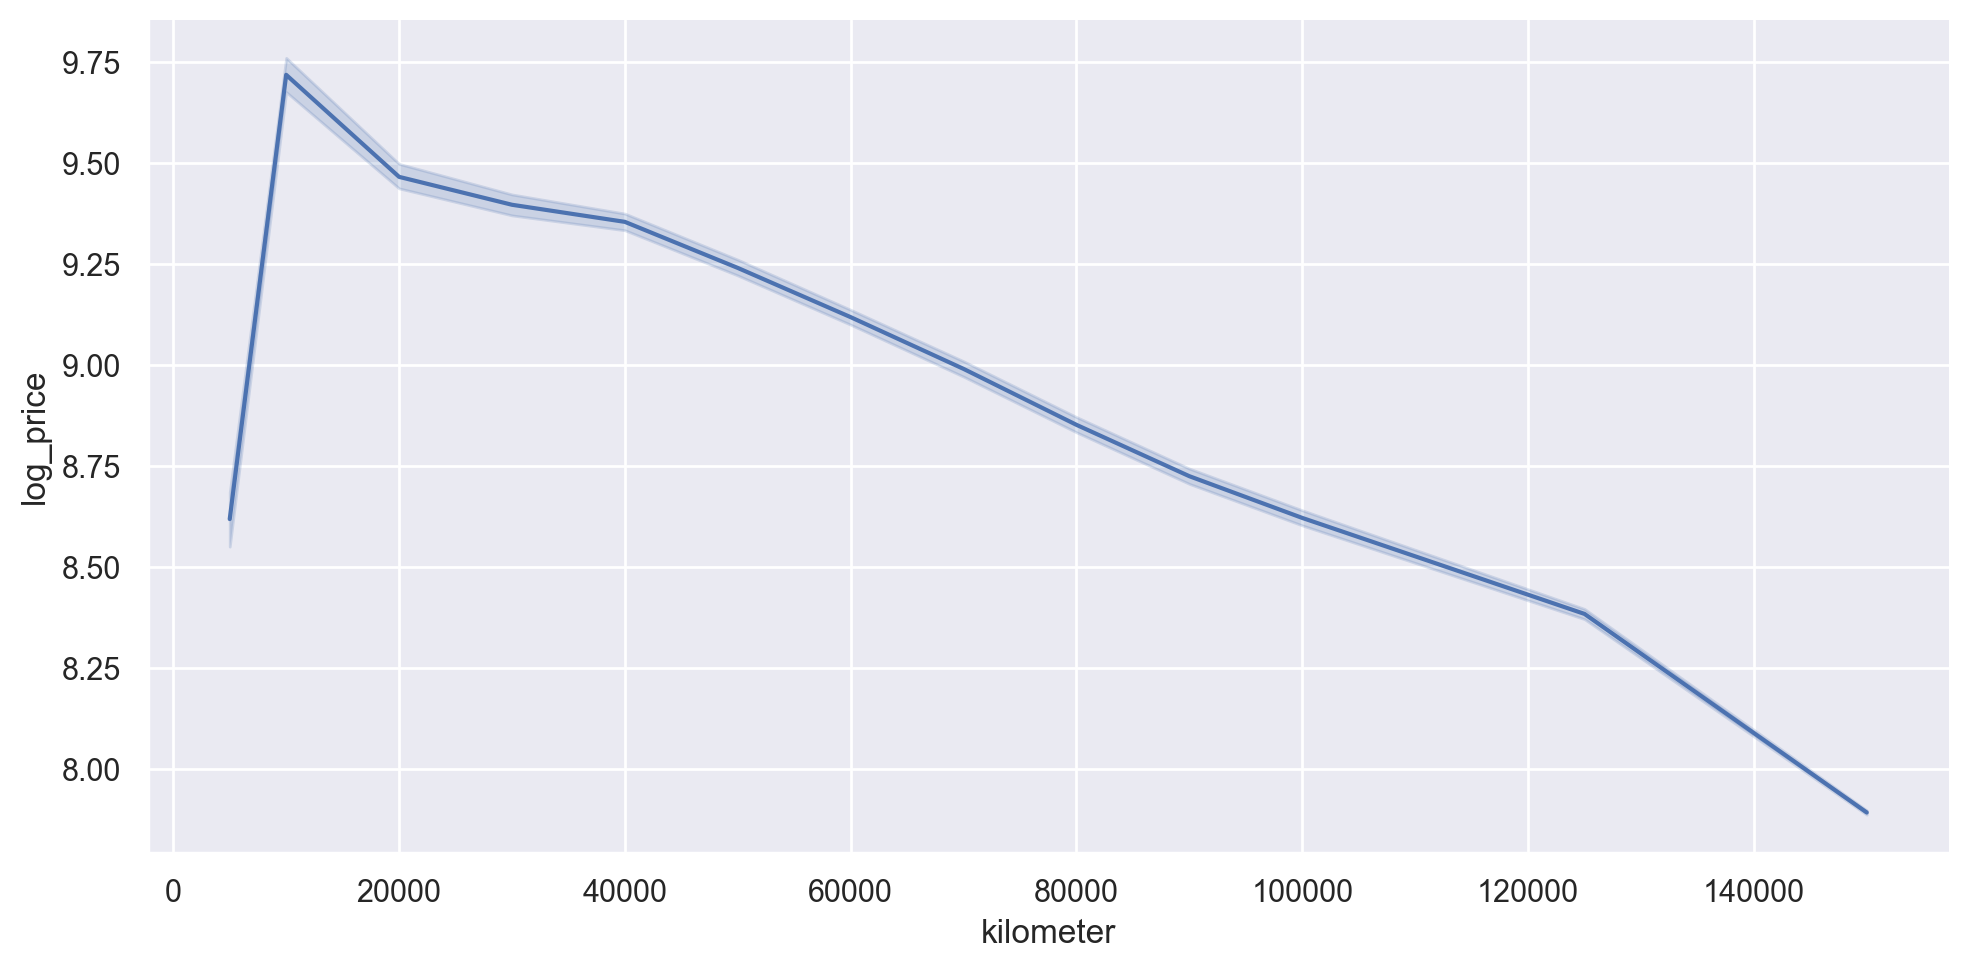

In [25]:
sns.relplot(data=data, x='kilometer', y='log_price', aspect=2, kind='line');

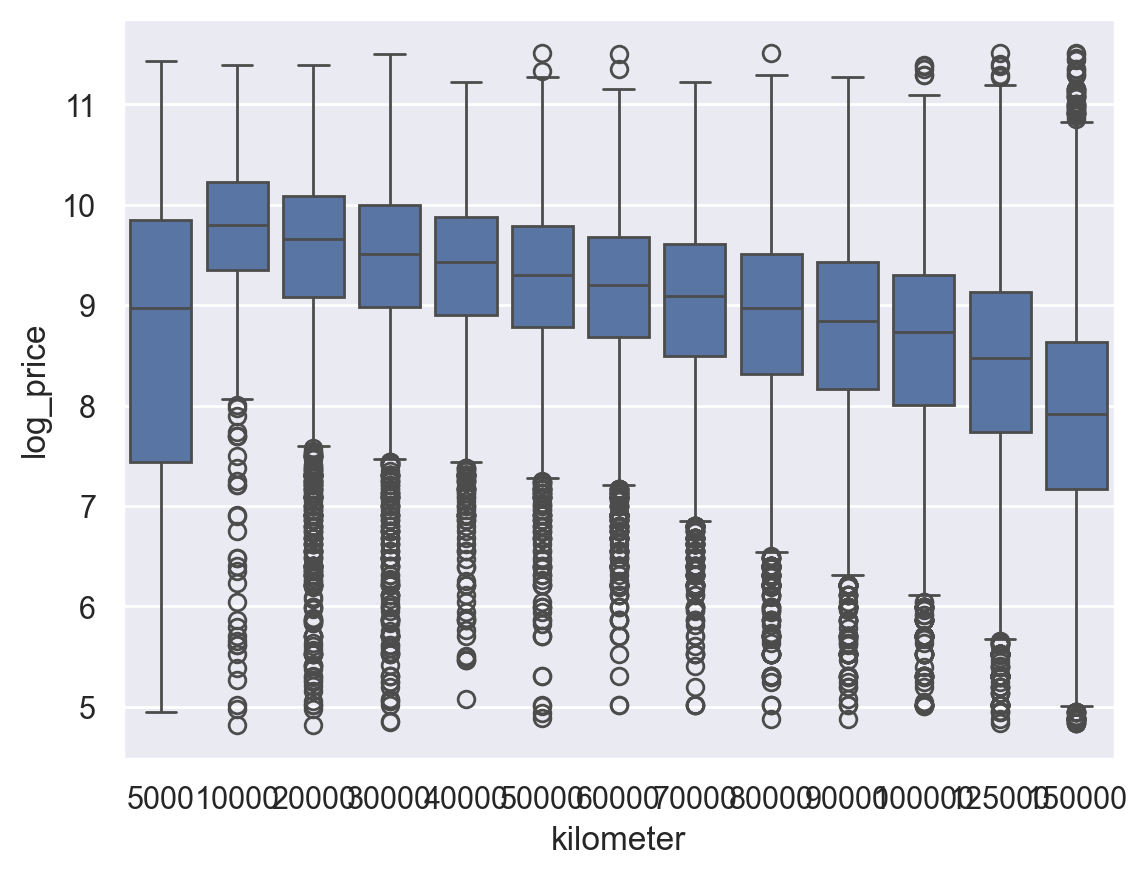

In [26]:
sns.boxplot(data=data, x='kilometer', y='log_price');

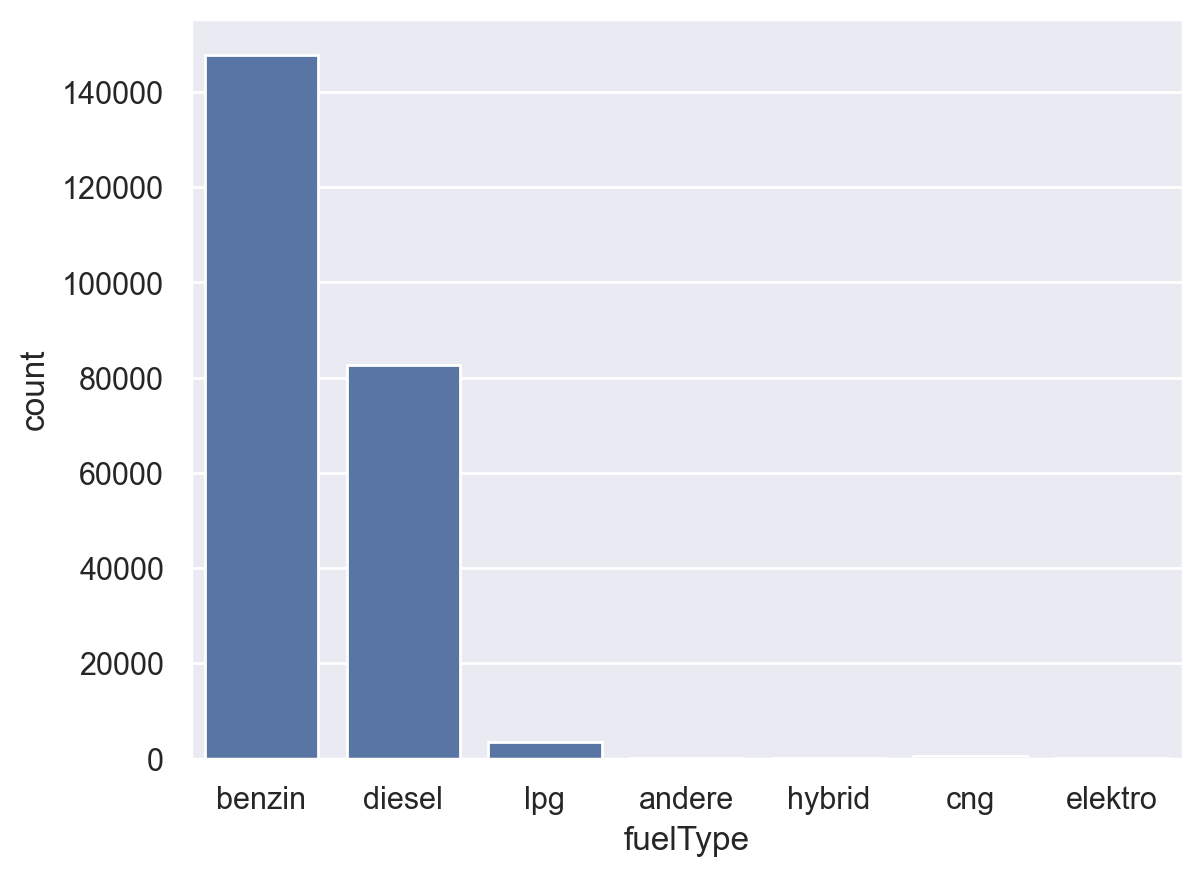

In [27]:
sns.countplot(data=data, x='fuelType');

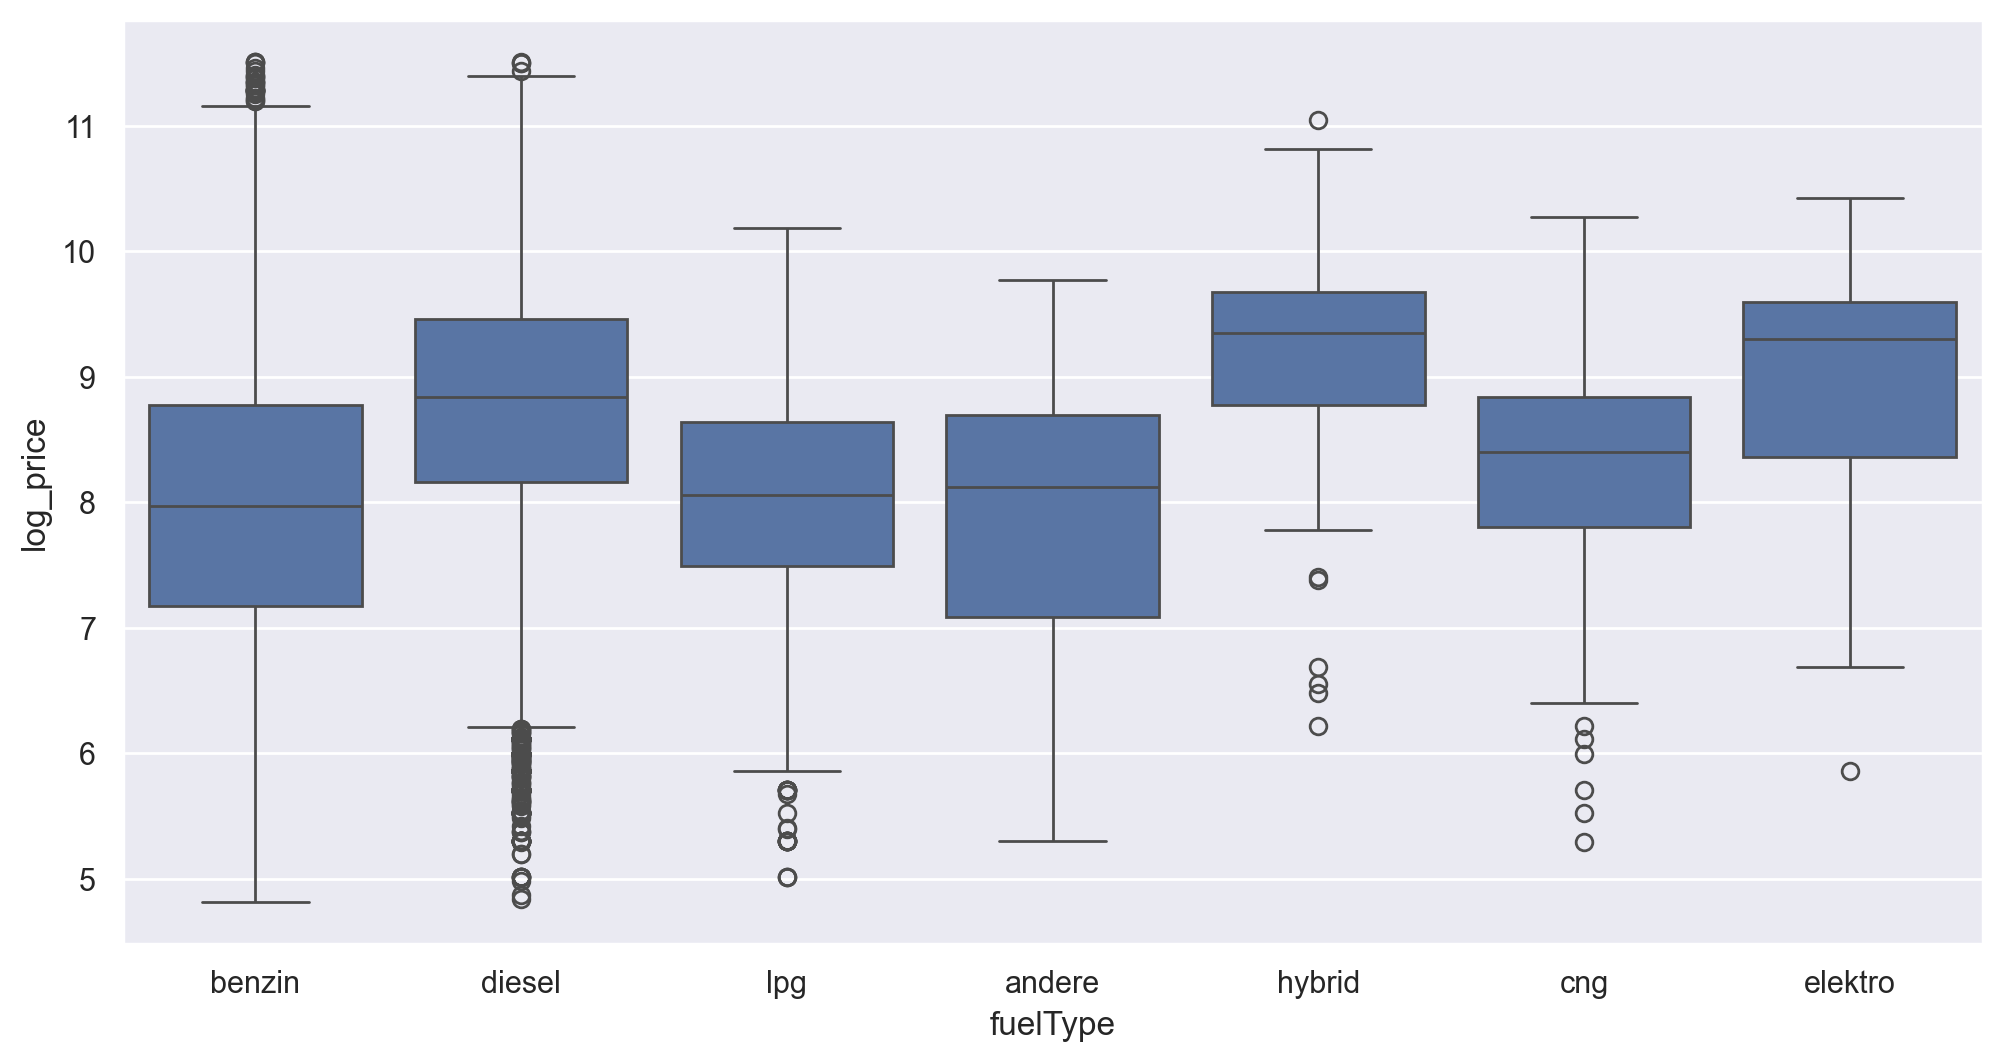

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='fuelType', y='log_price');

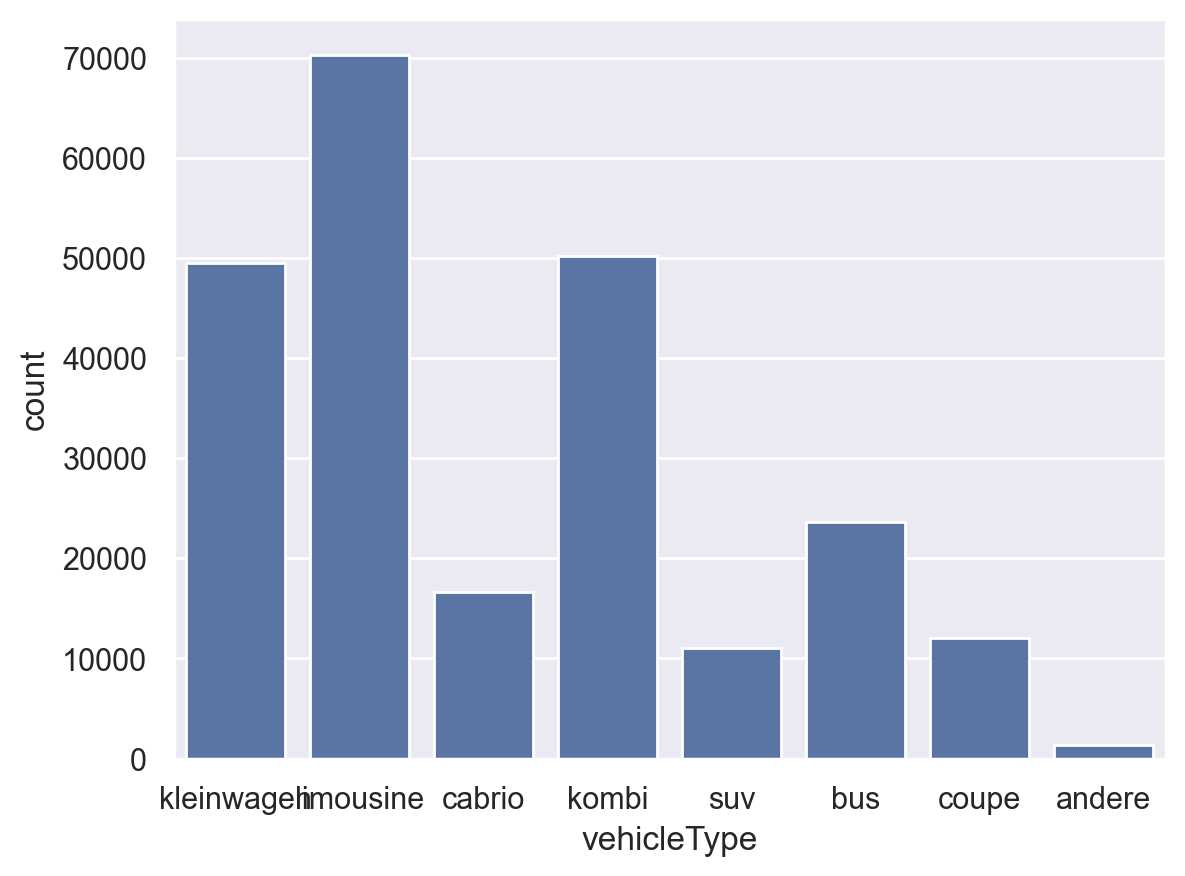

In [29]:
sns.countplot(data=data, x='vehicleType');

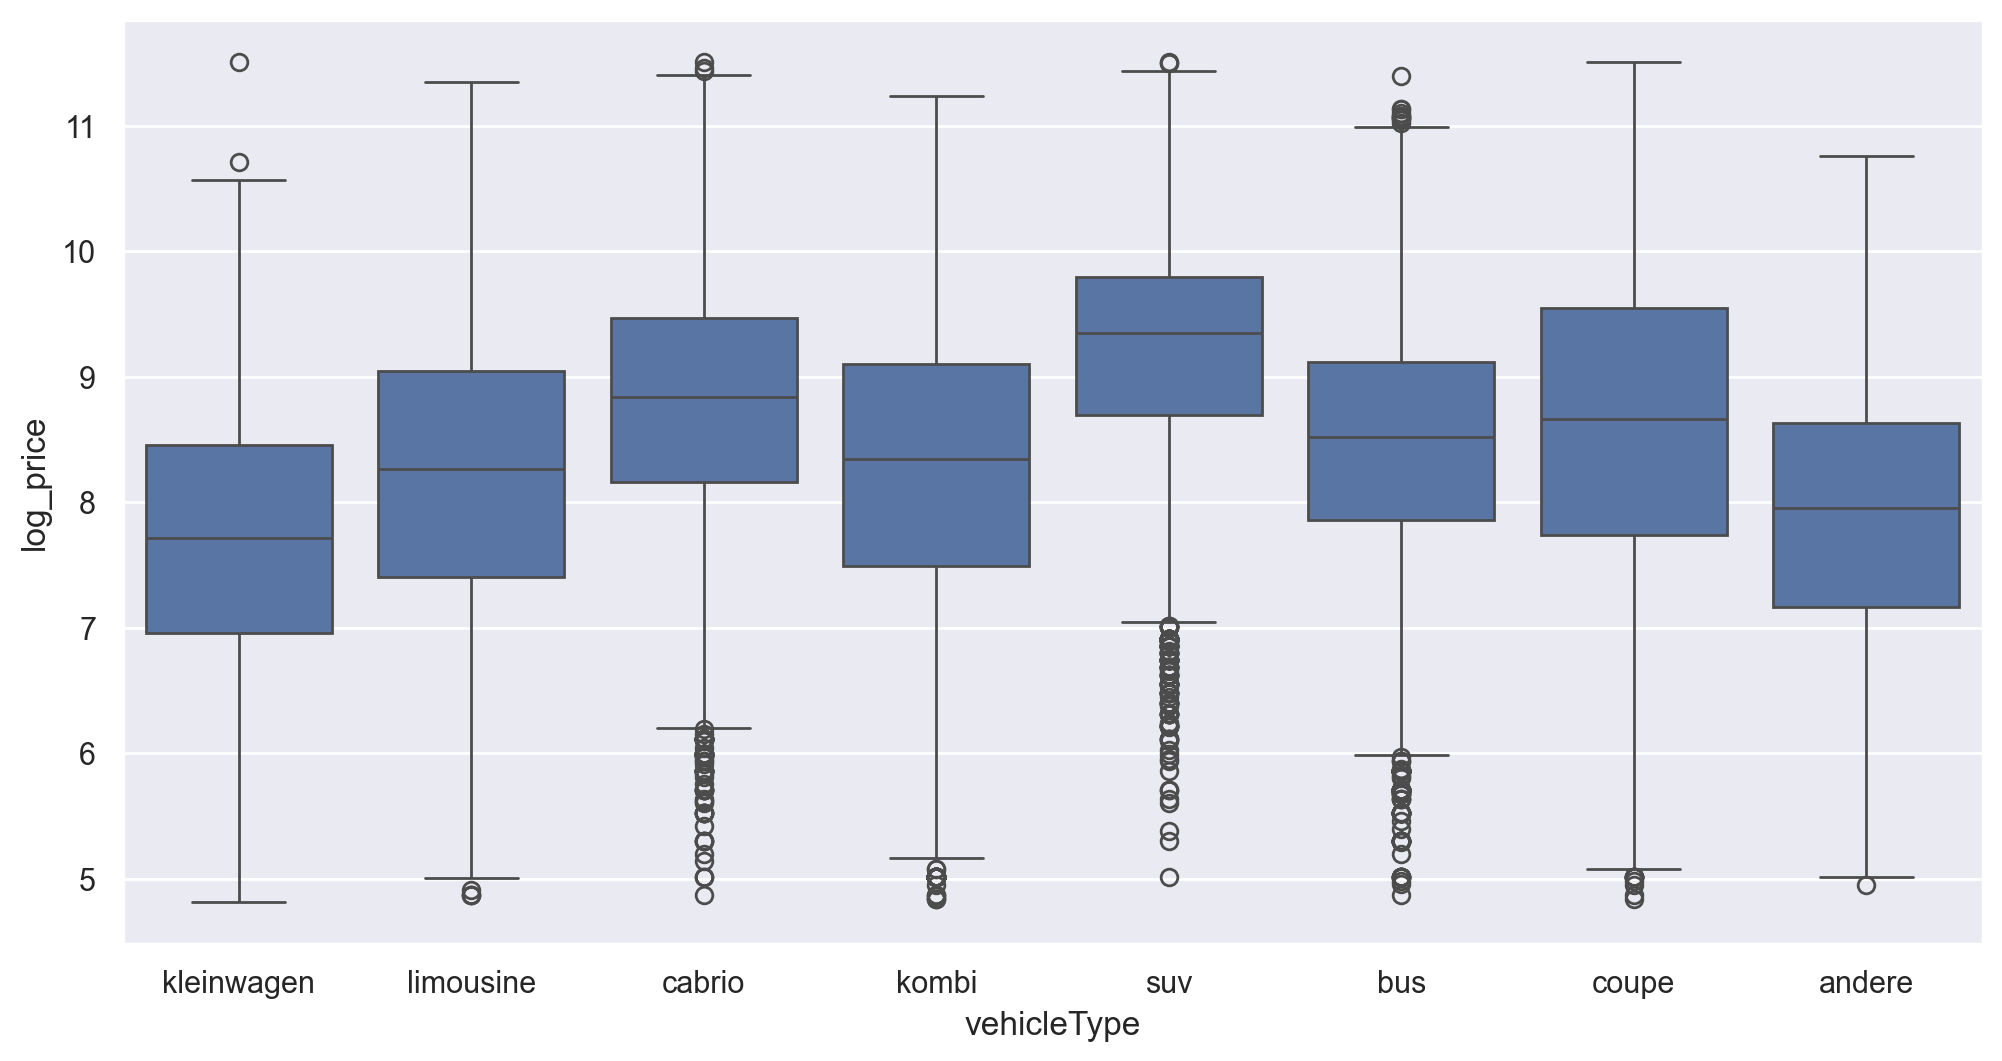

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='vehicleType', y='log_price');

In [31]:
data['brand'].value_counts().shape

(38,)

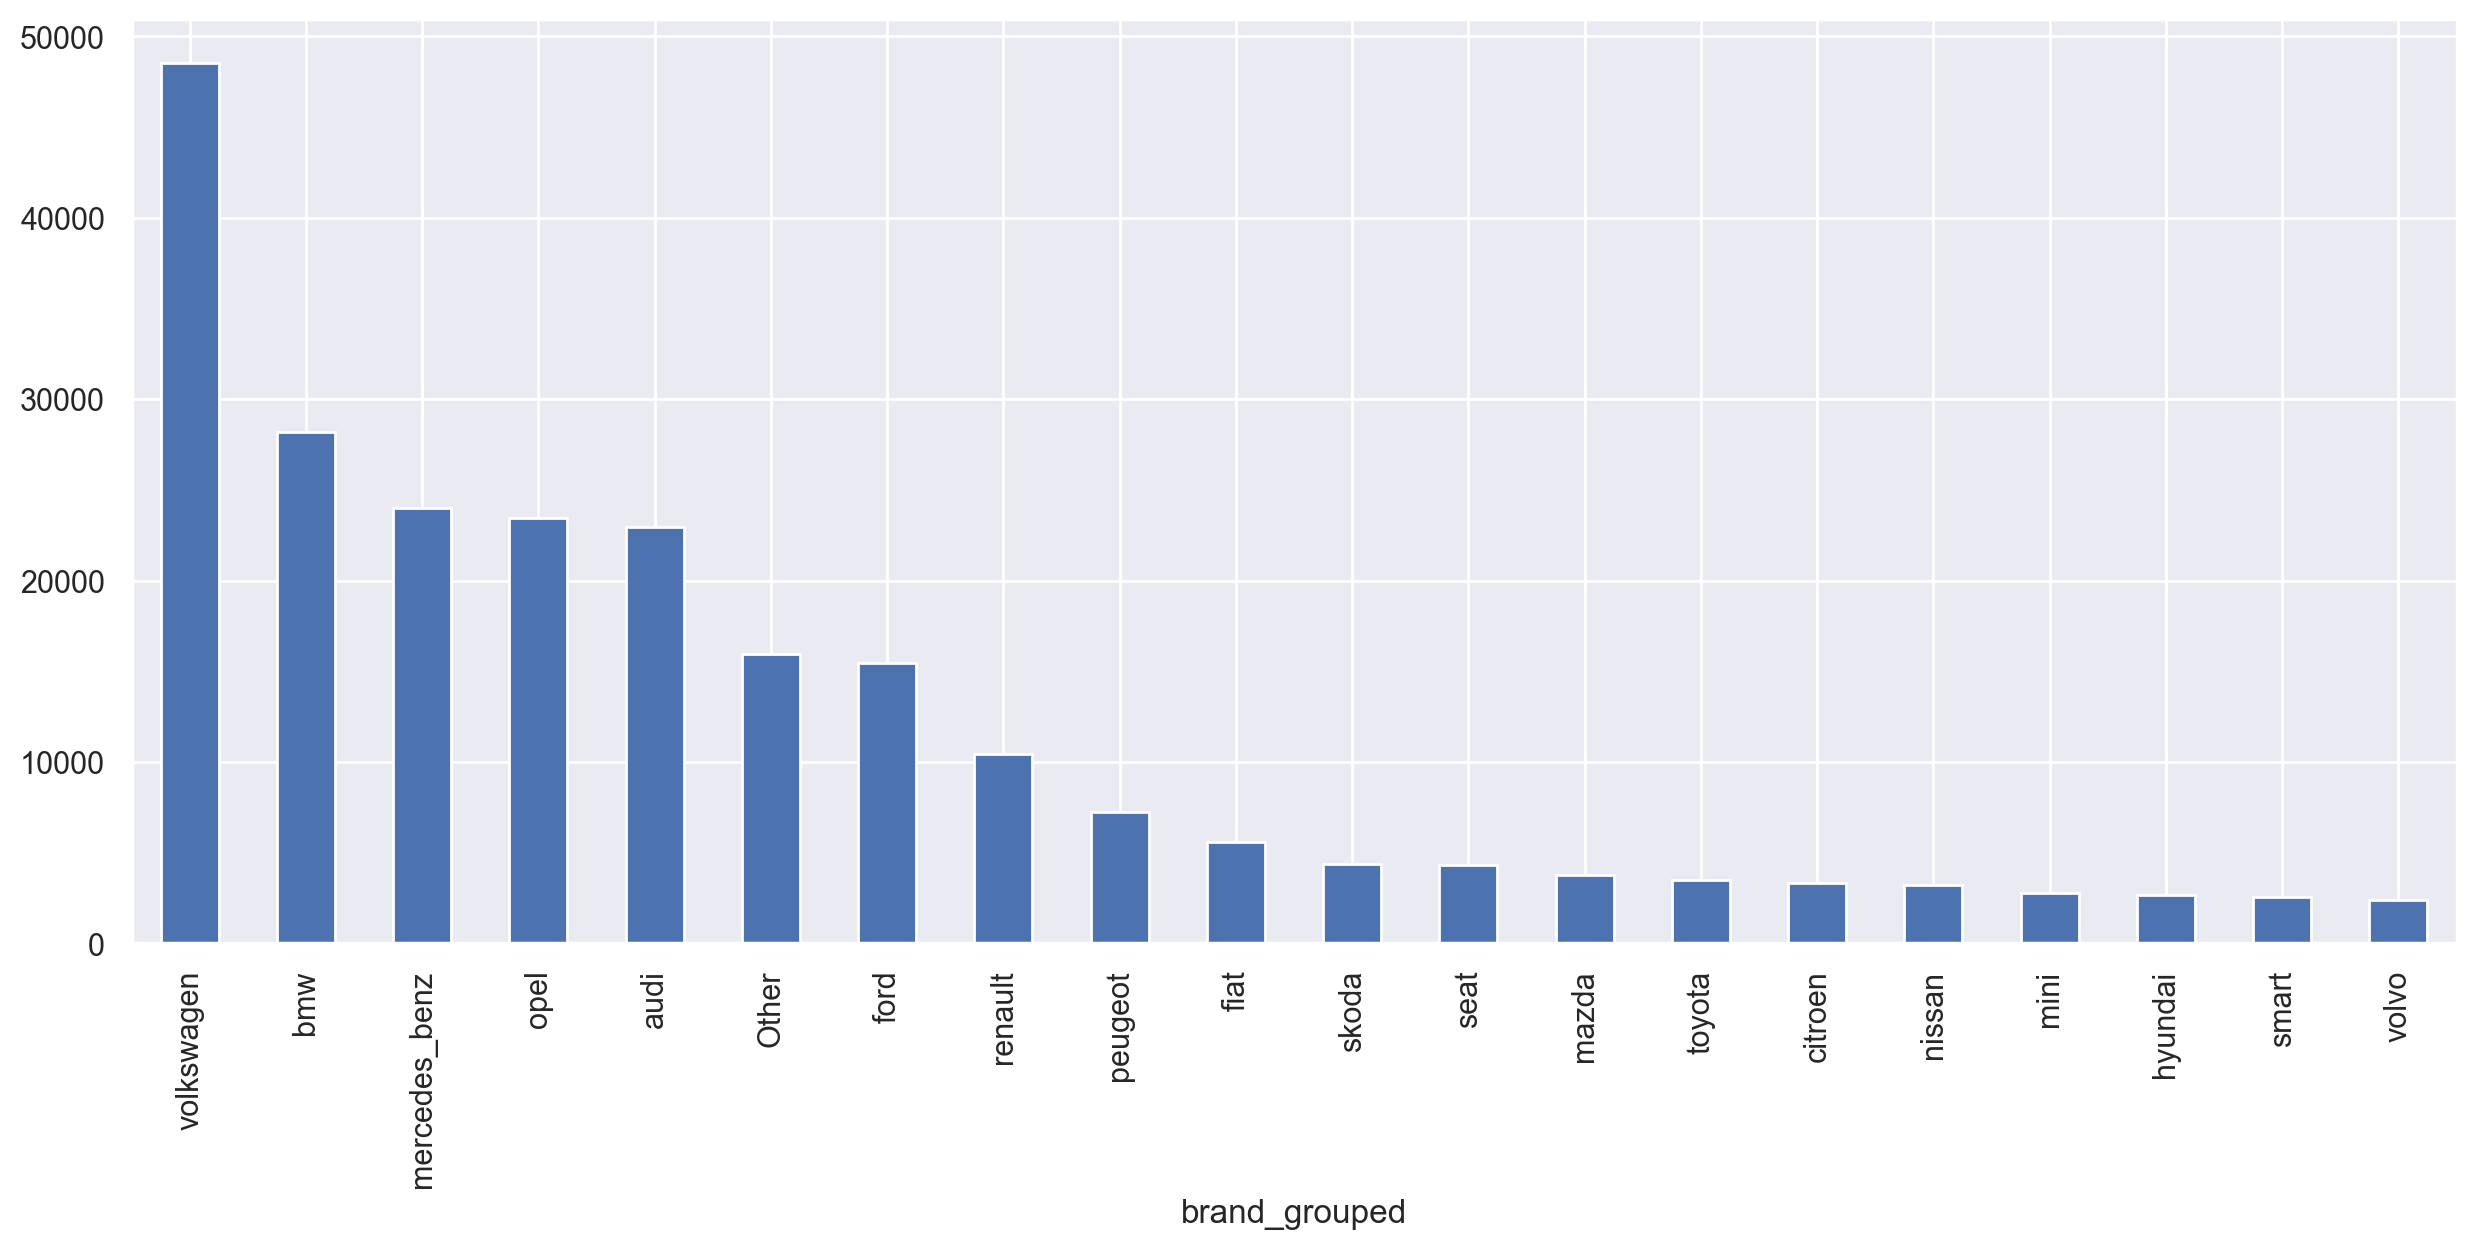

In [32]:
top_n = 19
brand_counts = data['brand'].value_counts()
top_brands = brand_counts.head(top_n).index
plot_data = data.copy()
plot_data['brand_grouped'] = data['brand'].where(data['brand'].isin(top_brands), 'Other')

plt.figure(figsize=(15, 6))
plot_data['brand_grouped'].value_counts().plot(kind='bar');

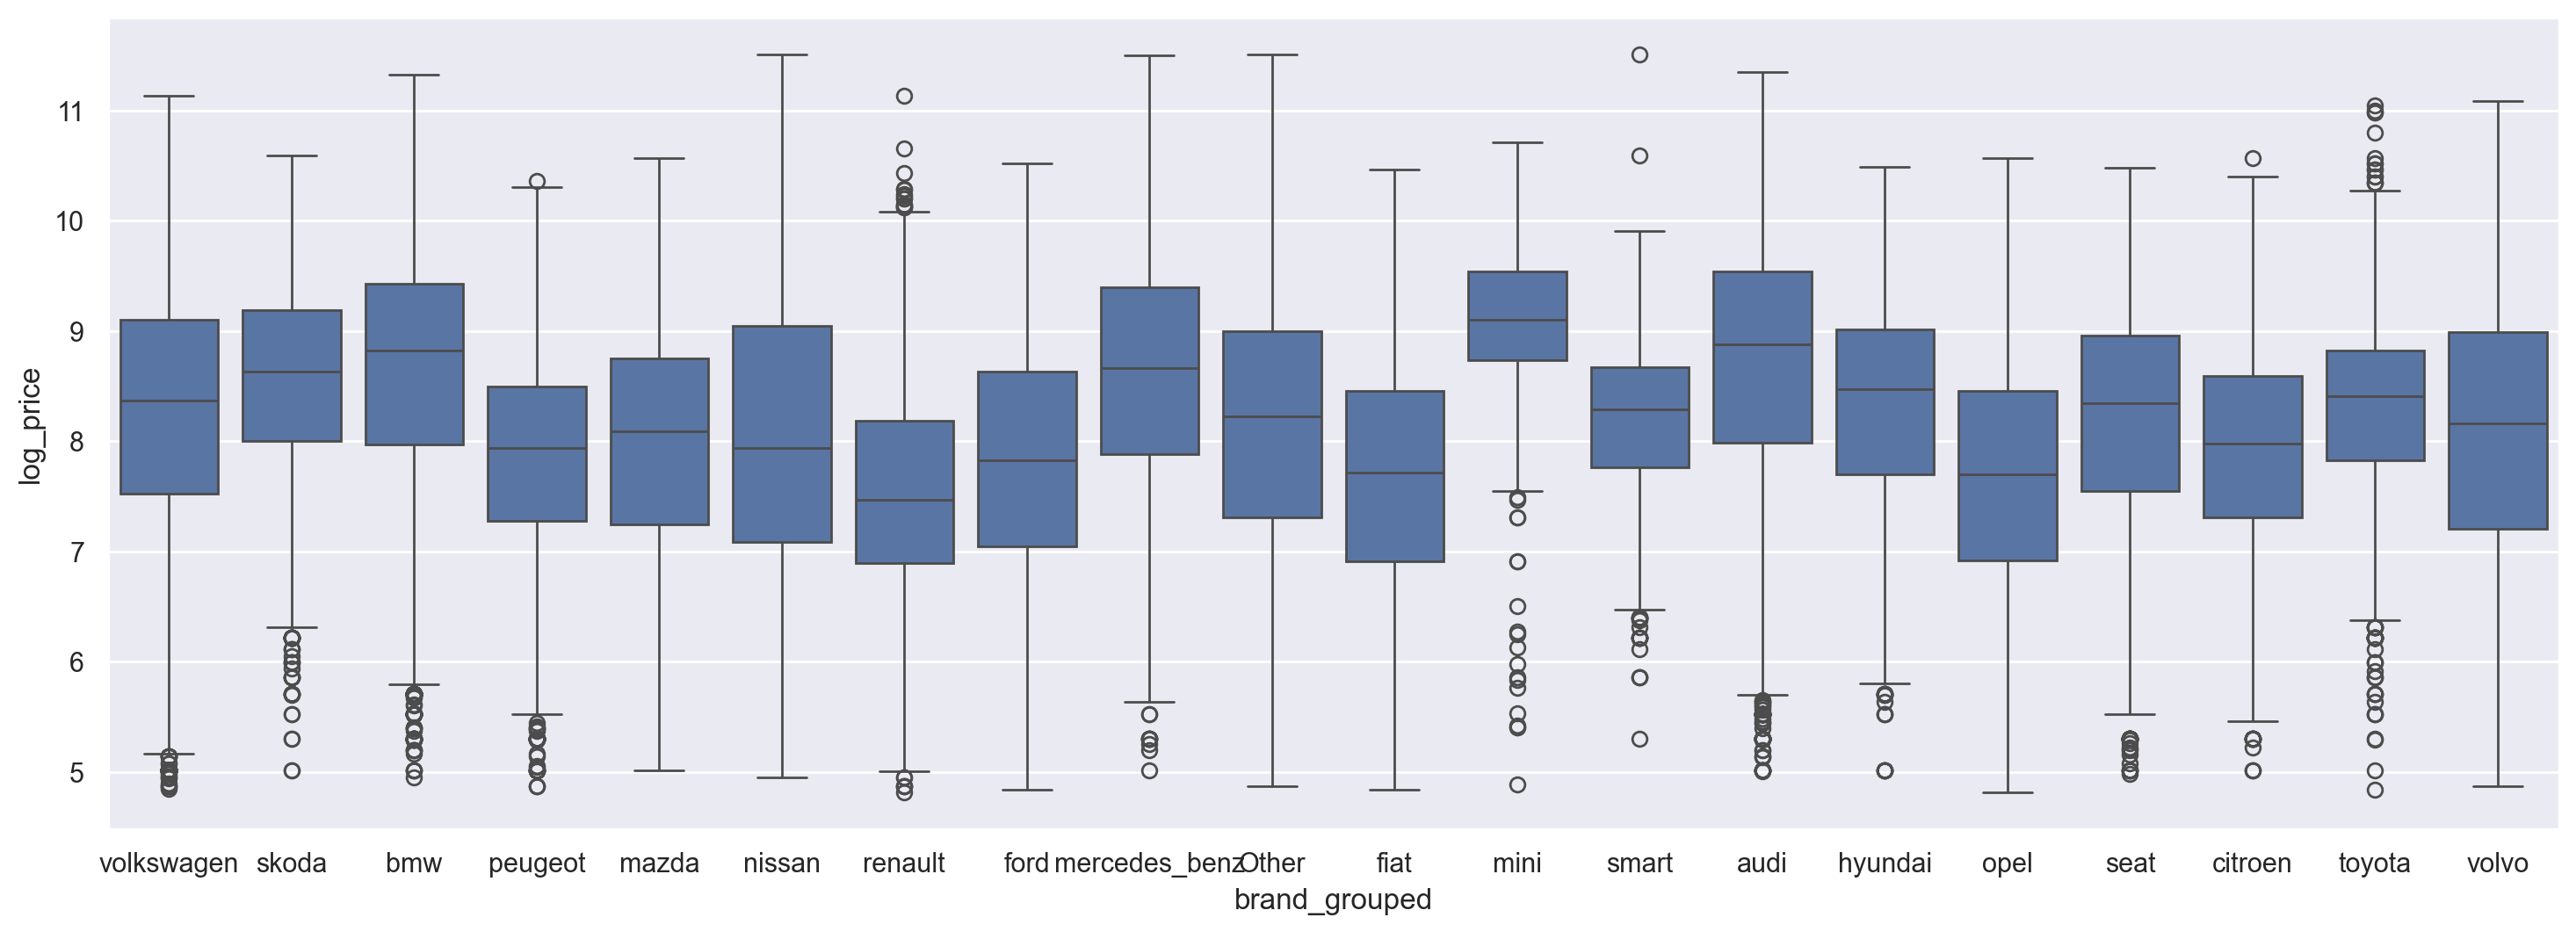

In [33]:
top_n = 19
brand_counts = data['brand'].value_counts()
top_brands = brand_counts.head(top_n).index
plot_data = data.copy()
plot_data['brand_grouped'] = data['brand'].where(data['brand'].isin(top_brands), 'Other')

plt.figure(figsize=(18, 6))
sns.boxplot(data=plot_data, x='brand_grouped', y='log_price');

In [34]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'autoAgeMonths', 'kilometer']
other = ['gearbox', 'notRepairedDamage']

In [35]:
data['bias'] = 1
other += ['bias']

In [36]:
x = data[categorical + numeric + other]
y = data['log_price']

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x).toarray()
y = y.to_numpy()

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [39]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

model = Ridge()

_ = model.fit(x_train, y_train)

y_pred = model.predict(x_val)

msle = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f'r2: {r2:.5f}')
print(f'msle: {msle}')

r2: 0.83736
msle: 0.1942247451171657


In [40]:
lambdas = np.logspace(-5, 1, 10)
max_iter = 500
dimension = x.shape[1]

df = pd.DataFrame(columns=["descent_name", "lambda", "num_iterations", "val_loss", "r2_val"])

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        'lambda_': None
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:

    descent_config['descent_name'] = descent_name

    for lambda_ in lambdas:

        descent_config['kwargs']['lambda_'] = lambda_

        regression = LinearRegression(
            descent_config=descent_config,
            max_iter=max_iter
        )
        _ = regression.fit(x_train, y_train)

        num_iterations = len(regression.loss_history) - 1

        val_loss = regression.calc_loss(x_val, y_val)

        y_pred = regression.predict(x_val)
        r2 = r2_score(y_val, y_pred)

        new_row = {
            "descent_name": descent_name,
            "lambda": lambda_,
            "num_iterations": num_iterations,
            "val_loss": val_loss,
            "r2_val": r2
        }
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        print(f'Обучение модели с параметрами descent_name = {descent_name}, lambda_ = {lambda_} завершено')

/var/folders/c5/brm9cy4j19g_2mgp6h2l2s540000gn/T/ipykernel_42098/3933696951.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


Обучение модели с параметрами descent_name = full, lambda_ = 1e-05 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 4.641588833612782e-05 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.00021544346900318823 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.001 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.004641588833612777 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.021544346900318822 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.1 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.46415888336127725 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 2.154434690031882 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 10.0 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 1e-05 завершено
Обучение модели с параметрами descent_name = stochastic, lamb

In [48]:
best_lambda = df.merge(df.groupby(by='descent_name', as_index=False)['val_loss'].agg('min'), on=['descent_name', 'val_loss'], how='inner')[['descent_name', 'lambda']]
best_lambda

,descent_name,lambda
0,full,2.154435
1,stochastic,0.464159
2,momentum,2.154435
3,adam,2.154435


In [50]:
max_iter = 500
dimension = x.shape[1]

benchmark_mse_descents = pd.DataFrame(columns=["descent_name", "lambda", "num_iterations", "train_loss", "test_loss", "r2_test", "train_loss_history"])

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        'lambda_': None
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:

    descent_config['descent_name'] = descent_name

    lambda_ = best_lambda[best_lambda['descent_name'] == descent_name]['lambda'].iloc[0]

    descent_config['kwargs']['lambda_'] = lambda_

    regression = LinearRegression(
        descent_config=descent_config,
        max_iter=max_iter
    )
    _ = regression.fit(x_train, y_train)

    num_iterations = len(regression.loss_history) - 1

    train_loss = regression.calc_loss(x_train, y_train)
    test_loss = regression.calc_loss(x_test, y_test)

    y_pred = regression.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    train_loss_history = regression.loss_history

    new_row = {
        "descent_name": descent_name,
        "lambda": lambda_,
        "num_iterations": num_iterations,
        "train_loss": train_loss,
        "test_loss": test_loss,
        "r2_test": r2,
        "train_loss_history": str(train_loss_history)
    }
    benchmark_mse_descents = pd.concat([benchmark_mse_descents, pd.DataFrame([new_row])], ignore_index=True)
    print(f'Обучение модели с параметрами descent_name = {descent_name}, lambda_ = {lambda_} завершено')

/var/folders/c5/brm9cy4j19g_2mgp6h2l2s540000gn/T/ipykernel_42098/214629793.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_mse_descents = pd.concat([benchmark_mse_descents, pd.DataFrame([new_row])], ignore_index=True)


Обучение модели с параметрами descent_name = full, lambda_ = 2.154434690031882 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.46415888336127725 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 2.154434690031882 завершено
Обучение модели с параметрами descent_name = adam, lambda_ = 2.154434690031882 завершено


In [58]:
benchmark_mse_descents

,descent_name,lambda,num_iterations,train_loss,test_loss,r2_test,train_loss_history
0,full,2.154435,66,0.258133,0.261182,0.784944,"[33.514226878928646, 736.1481795299524, 10334...."
1,stochastic,0.464159,210,0.311055,0.315289,0.740392,"[33.514226878928646, 2.871310315646096, 0.9303..."
2,momentum,2.154435,150,0.209123,0.213097,0.824537,"[33.514226878928646, 736.1481795299524, 5224.1..."
3,adam,2.154435,142,0.197083,0.201461,0.834117,"[33.514226878928646, 12.567212332372112, 22.92..."


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

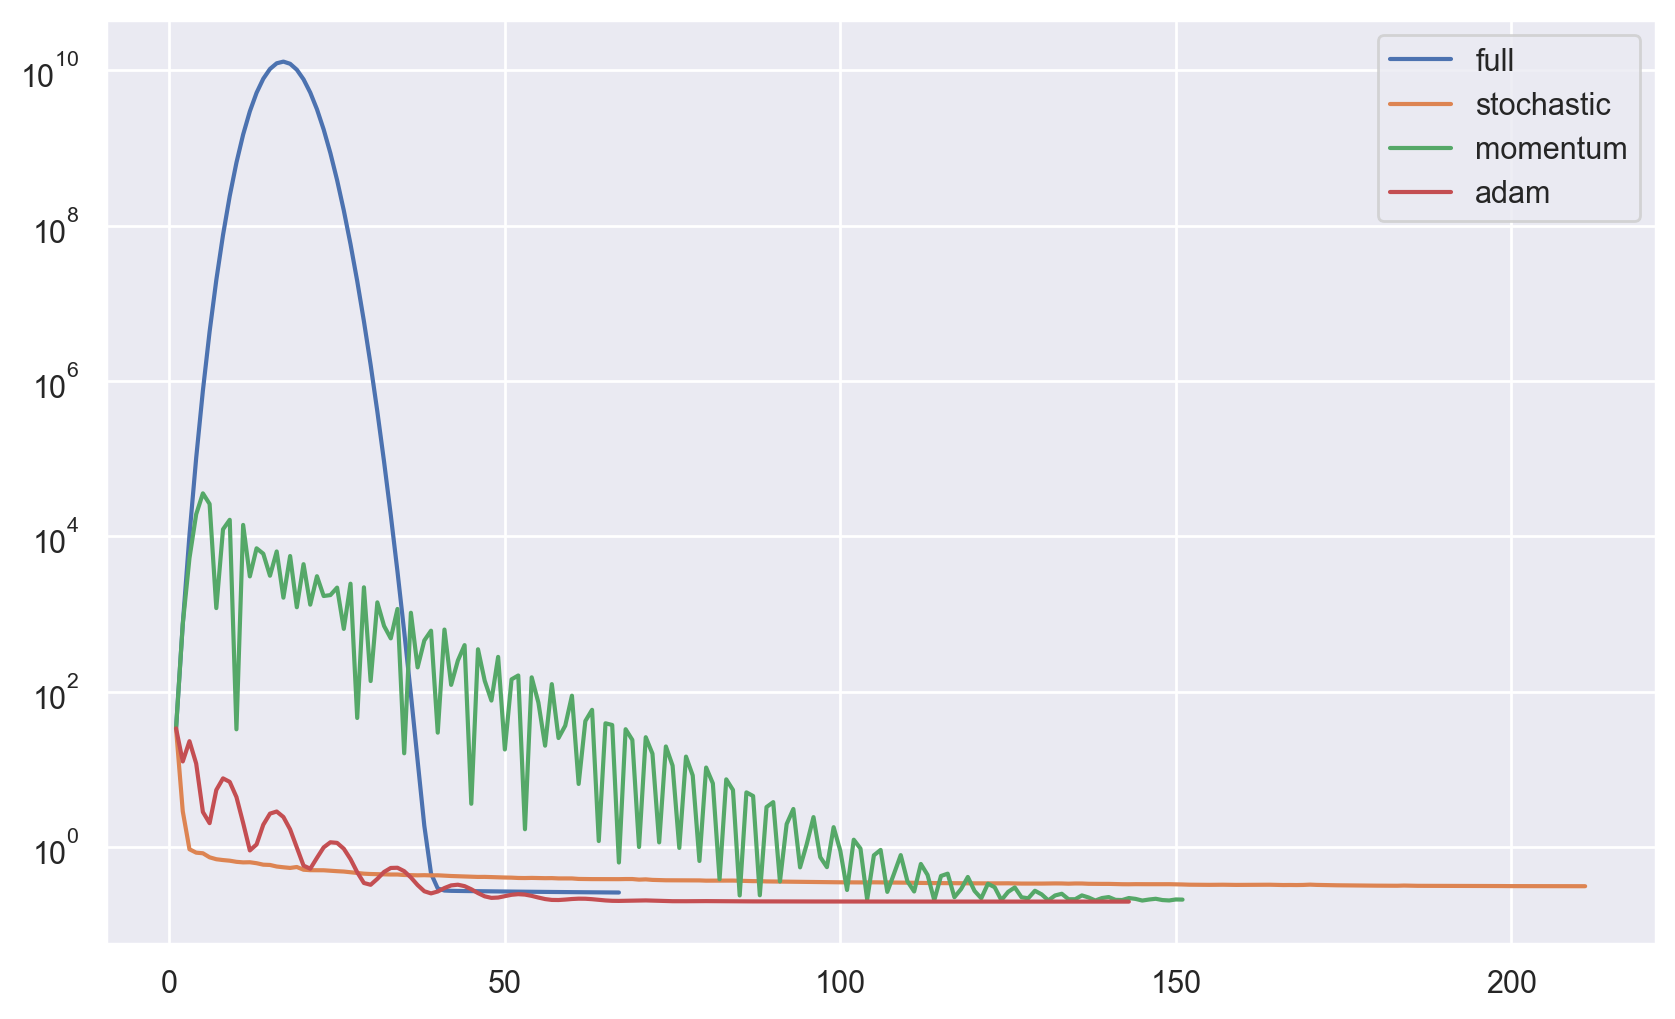

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    plot_data = benchmark_mse_descents[benchmark_mse_descents['descent_name'] == descent_name]
    train_losses = eval(plot_data['train_loss_history'].iloc[0])
    iterations = np.arange(1, len(train_losses) + 1)
    ax.plot(iterations, train_losses, label=descent_name)
ax.set_yscale('log')
ax.legend()
plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [54]:
import time

batch_sizes = np.arange(5, 500, 10)
k = 10
max_iter = 500
dimension = x.shape[1]

benchmark_stochastic = pd.DataFrame(columns=["batch_size", "time", "num_iterations"])

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'lambda_': benchmark_mse_descents[benchmark_mse_descents['descent_name'] == 'stochastic']['lambda'].iloc[0],
        'batch_size': None
    }
}

for batch_size in batch_sizes:
    descent_config['kwargs']['batch_size'] = batch_size

    num_iterations_arr = np.zeros(k)
    times_arr = np.zeros(k)

    for i in range(k):

        regression = LinearRegression(
            descent_config=descent_config,
            max_iter=max_iter
        )

        start_time = time.time()

        _ = regression.fit(x_train, y_train)

        end_time = time.time()

        training_time = end_time - start_time

        num_iterations = len(regression.loss_history) - 1

        num_iterations_arr[i] = num_iterations
        times_arr[i] = training_time

    new_row = {
        "batch_size": batch_size,
        "time": np.mean(times_arr),
        "num_iterations": np.mean(num_iterations_arr)
    }
    benchmark_stochastic = pd.concat([benchmark_stochastic, pd.DataFrame([new_row])], ignore_index=True)
    print(f'Обучение модели с параметрами batch_size = {batch_size} завершено')

/var/folders/c5/brm9cy4j19g_2mgp6h2l2s540000gn/T/ipykernel_42098/2005790025.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_stochastic = pd.concat([benchmark_stochastic, pd.DataFrame([new_row])], ignore_index=True)


Обучение модели с параметрами batch_size = 5 завершено
Обучение модели с параметрами batch_size = 15 завершено
Обучение модели с параметрами batch_size = 25 завершено
Обучение модели с параметрами batch_size = 35 завершено
Обучение модели с параметрами batch_size = 45 завершено
Обучение модели с параметрами batch_size = 55 завершено
Обучение модели с параметрами batch_size = 65 завершено
Обучение модели с параметрами batch_size = 75 завершено
Обучение модели с параметрами batch_size = 85 завершено
Обучение модели с параметрами batch_size = 95 завершено
Обучение модели с параметрами batch_size = 105 завершено
Обучение модели с параметрами batch_size = 115 завершено
Обучение модели с параметрами batch_size = 125 завершено
Обучение модели с параметрами batch_size = 135 завершено
Обучение модели с параметрами batch_size = 145 завершено
Обучение модели с параметрами batch_size = 155 завершено
Обучение модели с параметрами batch_size = 165 завершено
Обучение модели с параметрами batch_size =

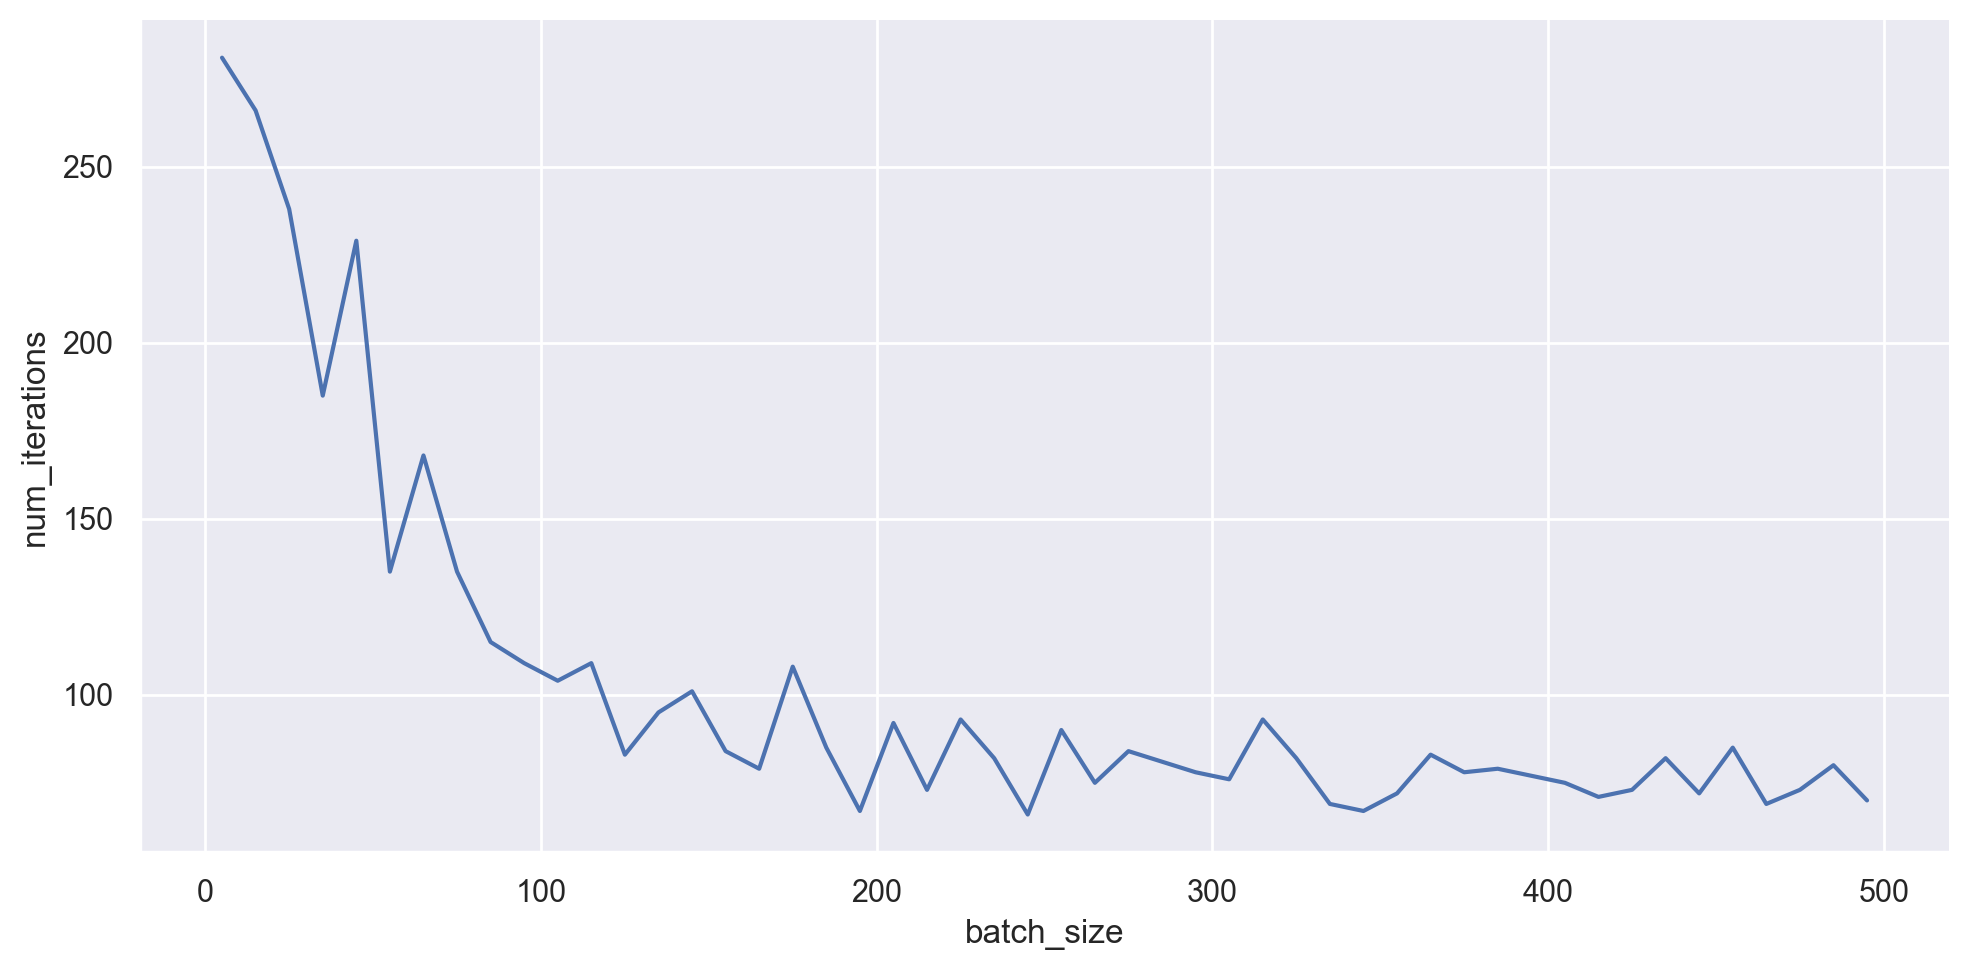

In [56]:
sns.relplot(data=benchmark_stochastic, x='batch_size', y='num_iterations', aspect=2, kind='line');

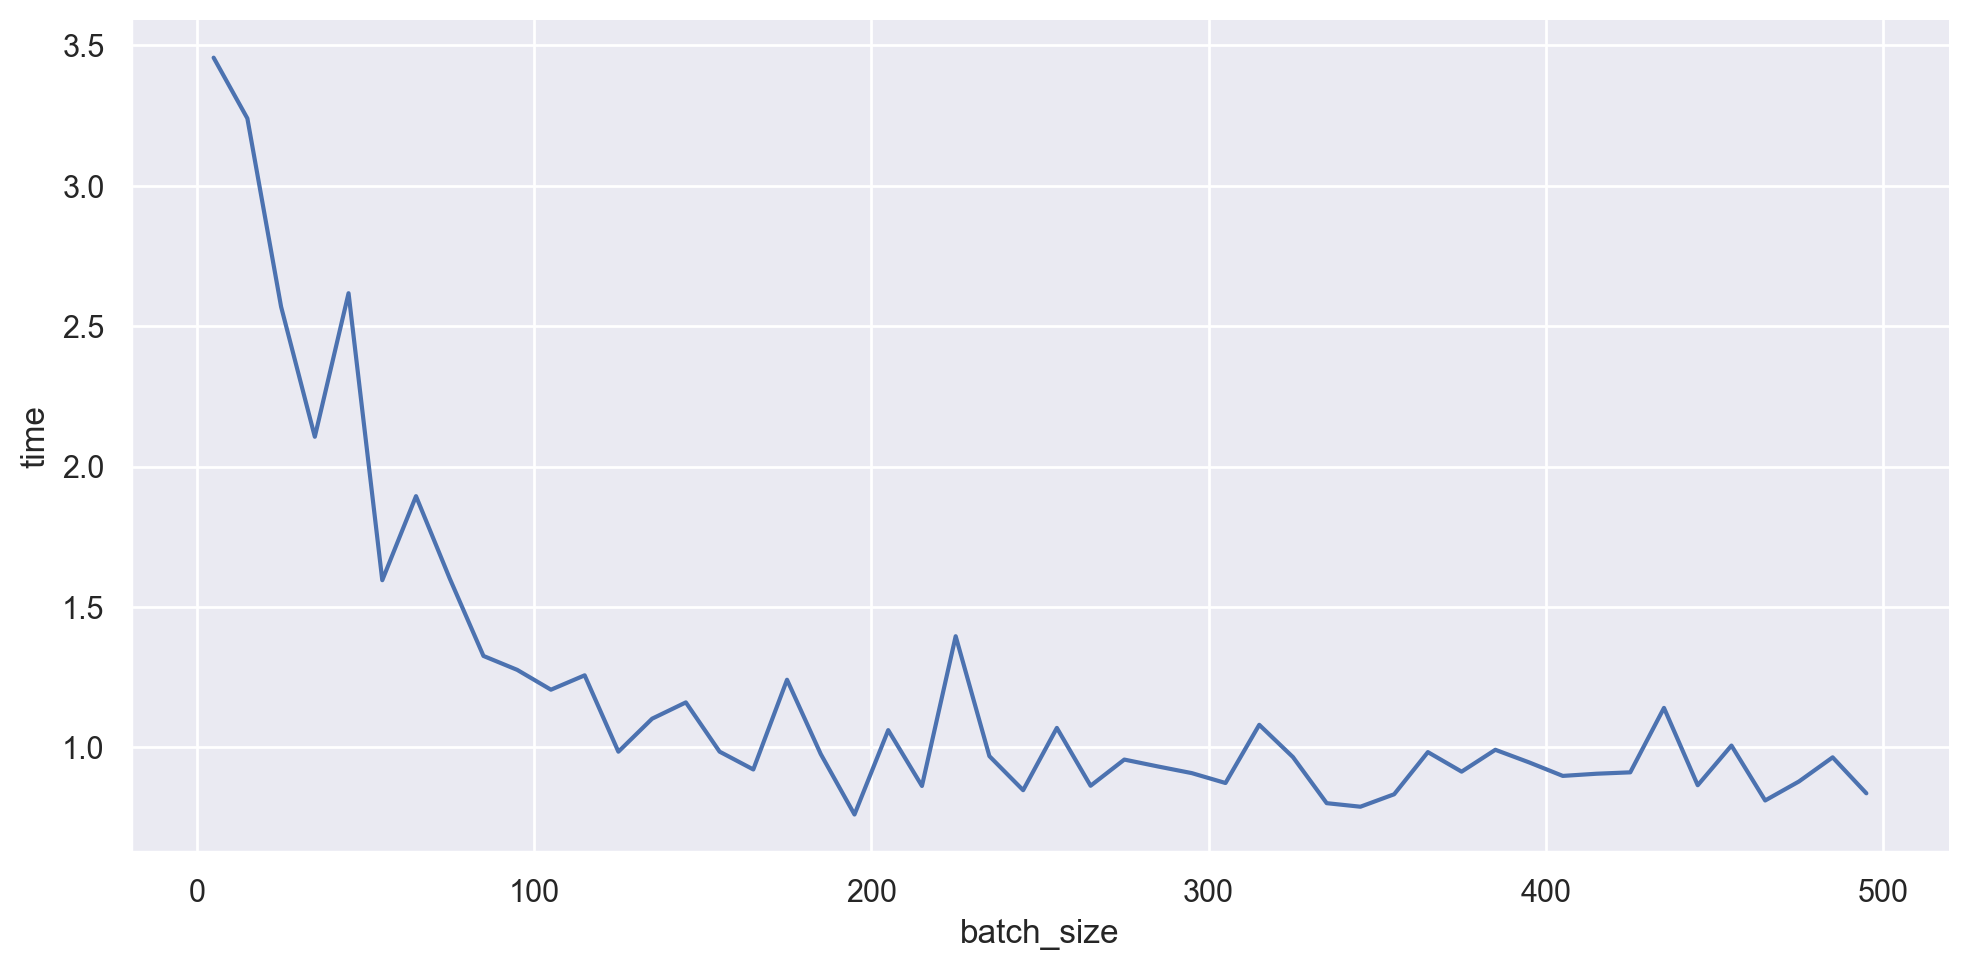

In [57]:
sns.relplot(data=benchmark_stochastic, x='batch_size', y='time', aspect=2, kind='line');

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [63]:
lambdas = np.logspace(-4, 0.8, 7)
mus = np.logspace(-4, 0.8, 5)
dimension = x.shape[1]

df = pd.DataFrame(columns=["descent_name", "lambda", "mu", "num_iterations", "val_loss", "r2_val"])

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_': None,
        'mu': None
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:

    descent_config['descent_name'] = descent_name

    for lambda_ in lambdas:

        descent_config['kwargs']['lambda_'] = lambda_

        for mu in mus:
            
            descent_config['kwargs']['mu'] = mu

            regression = LinearRegression(
                descent_config=descent_config
            )
            _ = regression.fit(x_train, y_train)

            num_iterations = len(regression.loss_history) - 1

            val_loss = regression.calc_loss(x_val, y_val)

            y_pred = regression.predict(x_val)
            r2 = r2_score(y_val, y_pred)

            new_row = {
                "descent_name": descent_name,
                "lambda": lambda_,
                "mu": mu,
                "num_iterations": num_iterations,
                "val_loss": val_loss,
                "r2_val": r2
            }
            df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
            print(f'Обучение модели с параметрами descent_name = {descent_name}, lambda_ = {lambda_}, mu = {mu} завершено')

/var/folders/c5/brm9cy4j19g_2mgp6h2l2s540000gn/T/ipykernel_42098/2514342427.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


Обучение модели с параметрами descent_name = full, lambda_ = 0.0001, mu = 0.0001 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.0001, mu = 0.001584893192461114 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.0001, mu = 0.025118864315095794 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.0001, mu = 0.3981071705534969 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.0001, mu = 6.309573444801933 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.000630957344480193, mu = 0.0001 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.000630957344480193, mu = 0.001584893192461114 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.000630957344480193, mu = 0.025118864315095794 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.000630957344480193, mu = 0.3981071705534969 завершено
Обучение модели с параметрами desc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/viktornovoselcev/Documents/ML/ml_hse_homeworks/descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.mean((self.w @ x.T - y) ** 2)
/Users/viktornovoselcev/Documents/ML/ml_hse_homeworks/linear_regression.py:39: RuntimeWarning: overflow encountered in square
  if np.sum(weight_diff ** 2) < self.tolerance:
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.f

Обучение модели с параметрами descent_name = full, lambda_ = 6.309573444801933, mu = 6.309573444801933 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.0001, mu = 0.0001 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.0001, mu = 0.001584893192461114 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.0001, mu = 0.025118864315095794 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.0001, mu = 0.3981071705534969 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.0001, mu = 6.309573444801933 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.000630957344480193, mu = 0.0001 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.000630957344480193, mu = 0.001584893192461114 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.000630957344480193, mu = 0.025118864315095794 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/viktornovoselcev/Documents/ML/ml_hse_homeworks/descents.py:79: RuntimeWarning: overflow encountered in square
  loss = np.mean((self.w @ x.T - y) ** 2)
/Users/viktornovoselcev/Documents/ML/ml_hse_homeworks/linear_regression.py:39: RuntimeWarning: overflow encountered in square
  if np.sum(weight_diff ** 2) < self.tolerance:
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.f

Обучение модели с параметрами descent_name = stochastic, lambda_ = 6.309573444801933, mu = 6.309573444801933 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.0001, mu = 0.0001 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.0001, mu = 0.001584893192461114 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.0001, mu = 0.025118864315095794 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.0001, mu = 0.3981071705534969 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.0001, mu = 6.309573444801933 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.000630957344480193, mu = 0.0001 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.000630957344480193, mu = 0.001584893192461114 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.000630957344480193, mu = 0.025118864315095794 завершено


In [67]:
best_lambda_mu = df.merge(df.groupby(by='descent_name', as_index=False)['val_loss'].agg('min'), on=['descent_name', 'val_loss'], how='inner')[['descent_name', 'lambda', 'mu']]
best_lambda_mu

,descent_name,lambda,mu
0,full,1.000000,0.025119
1,stochastic,1.000000,0.025119
2,momentum,1.000000,0.001585
3,adam,6.309573,0.000100


In [71]:
dimension = x.shape[1]

benchmark_mse_descents_reg = pd.DataFrame(columns=["descent_name", "lambda", "mu", "num_iterations", "train_loss", "test_loss", "r2_test", "train_loss_history"])

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_': None,
        'mu': None
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:

    descent_config['descent_name'] = descent_name

    lambda_ = best_lambda_mu[best_lambda_mu['descent_name'] == descent_name]['lambda'].iloc[0]
    mu = best_lambda_mu[best_lambda_mu['descent_name'] == descent_name]['mu'].iloc[0]

    descent_config['kwargs']['lambda_'] = lambda_
    descent_config['kwargs']['mu'] = mu

    regression = LinearRegression(
        descent_config=descent_config
    )
    _ = regression.fit(x_train, y_train)

    num_iterations = len(regression.loss_history) - 1

    train_loss = regression.calc_loss(x_train, y_train)
    test_loss = regression.calc_loss(x_test, y_test)

    y_pred = regression.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    train_loss_history = regression.loss_history

    new_row = {
        "descent_name": descent_name,
        "lambda": lambda_,
        "mu": mu,
        "num_iterations": num_iterations,
        "train_loss": train_loss,
        "test_loss": test_loss,
        "r2_test": r2,
        "train_loss_history": str(train_loss_history)
    }
    benchmark_mse_descents_reg = pd.concat([benchmark_mse_descents_reg, pd.DataFrame([new_row])], ignore_index=True)
    print(f'Обучение модели с параметрами descent_name = {descent_name}, lambda_ = {lambda_}, mu = {mu} завершено')

/var/folders/c5/brm9cy4j19g_2mgp6h2l2s540000gn/T/ipykernel_42098/1551700357.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_mse_descents_reg = pd.concat([benchmark_mse_descents_reg, pd.DataFrame([new_row])], ignore_index=True)


Обучение модели с параметрами descent_name = full, lambda_ = 0.999999999999999, mu = 0.025118864315095794 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 0.999999999999999, mu = 0.025118864315095794 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 0.999999999999999, mu = 0.001584893192461114 завершено
Обучение модели с параметрами descent_name = adam, lambda_ = 6.309573444801933, mu = 0.0001 завершено


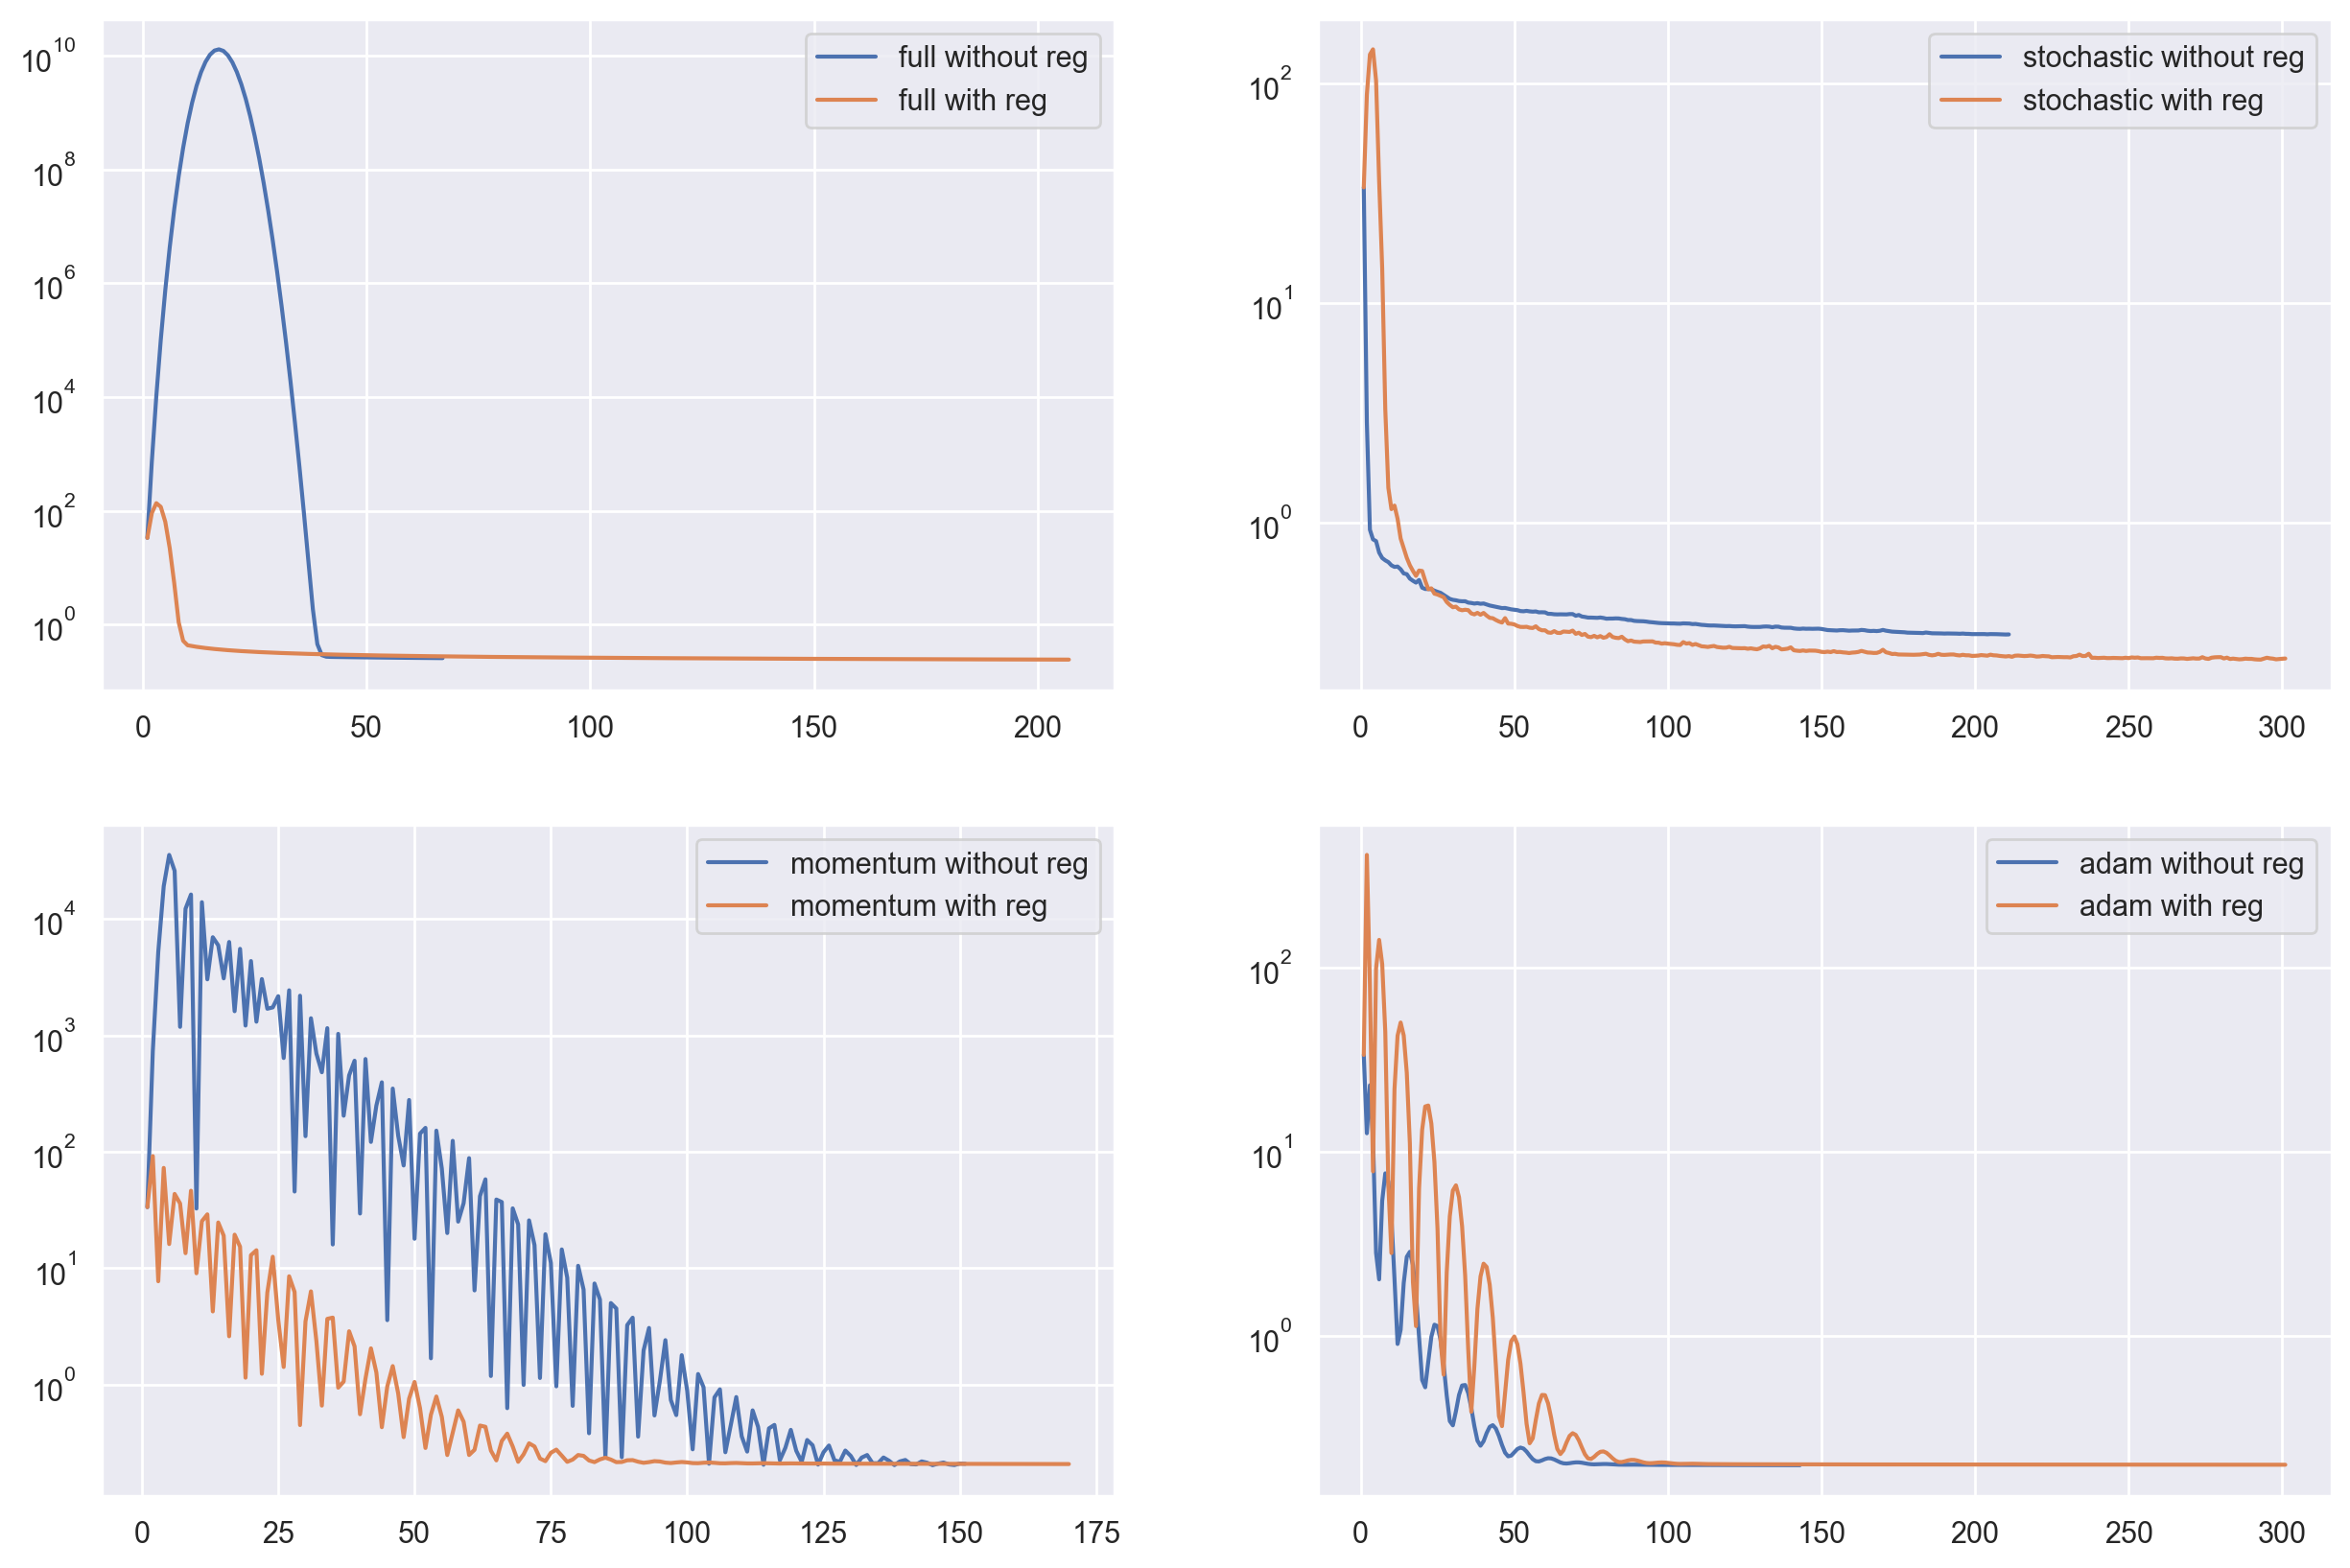

In [74]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
descent_names = ['full', 'stochastic', 'momentum', 'adam']
for i in range(len(descent_name)):
    descent_name = descent_names[i]
    plot_data = benchmark_mse_descents[benchmark_mse_descents['descent_name'] == descent_name]
    train_losses = eval(plot_data['train_loss_history'].iloc[0])
    iterations = np.arange(1, len(train_losses) + 1)
    ax[i // 2, i % 2].plot(iterations, train_losses, label=f'{descent_name} without reg')

    plot_data_reg = benchmark_mse_descents_reg[benchmark_mse_descents_reg['descent_name'] == descent_name]
    train_losses_reg = eval(plot_data_reg['train_loss_history'].iloc[0])
    iterations_reg = np.arange(1, len(train_losses_reg) + 1)
    ax[i // 2, i % 2].plot(iterations_reg, train_losses_reg, label=f'{descent_name} with reg')

    ax[i // 2, i % 2].set_yscale('log')
    ax[i // 2, i % 2].legend()

plt.show()

In [75]:
benchmark_mse_descents_reg

,descent_name,lambda,mu,num_iterations,train_loss,test_loss,r2_test,train_loss_history
0,full,1.000000,0.025119,206,0.243186,0.245870,0.797552,"[33.514226878928646, 91.5167108541534, 136.563..."
1,stochastic,1.000000,0.025119,300,0.241698,0.244287,0.798855,"[33.514226878928646, 88.34140420752352, 134.70..."
2,momentum,1.000000,0.001585,169,0.208011,0.211623,0.825750,"[33.514226878928646, 92.02587246905927, 7.7329..."
3,adam,6.309573,0.000100,300,0.198177,0.202959,0.832884,"[33.514226878928646, 409.94170327486705, 80.42..."


In [76]:
benchmark_mse_descents

,descent_name,lambda,num_iterations,train_loss,test_loss,r2_test,train_loss_history
0,full,2.154435,66,0.258133,0.261182,0.784944,"[33.514226878928646, 736.1481795299524, 10334...."
1,stochastic,0.464159,210,0.311055,0.315289,0.740392,"[33.514226878928646, 2.871310315646096, 0.9303..."
2,momentum,2.154435,150,0.209123,0.213097,0.824537,"[33.514226878928646, 736.1481795299524, 5224.1..."
3,adam,2.154435,142,0.197083,0.201461,0.834117,"[33.514226878928646, 12.567212332372112, 22.92..."


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$\nabla_{w} Q(w) = \frac{1}{l} X^T \tanh(X w - y)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [79]:
lambdas = np.logspace(-5, 1, 10)
dimension = x.shape[1]

df = pd.DataFrame(columns=["descent_name", "lambda", "num_iterations", "val_loss", "r2_val"])

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        'loss_function': LossFunction.LogCosh,
        'lambda_': None
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:

    descent_config['descent_name'] = descent_name

    for lambda_ in lambdas:

        descent_config['kwargs']['lambda_'] = lambda_

        regression = LinearRegression(
            descent_config=descent_config
        )
        _ = regression.fit(x_train, y_train)

        num_iterations = len(regression.loss_history) - 1

        val_loss = regression.calc_loss(x_val, y_val)

        y_pred = regression.predict(x_val)
        r2 = r2_score(y_val, y_pred)

        new_row = {
            "descent_name": descent_name,
            "lambda": lambda_,
            "num_iterations": num_iterations,
            "val_loss": val_loss,
            "r2_val": r2
        }
        df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
        print(f'Обучение модели с параметрами descent_name = {descent_name}, lambda_ = {lambda_} завершено')

/var/folders/c5/brm9cy4j19g_2mgp6h2l2s540000gn/T/ipykernel_42098/2550418420.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


Обучение модели с параметрами descent_name = full, lambda_ = 1e-05 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 4.641588833612782e-05 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.00021544346900318823 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.001 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.004641588833612777 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.021544346900318822 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.1 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 0.46415888336127725 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 2.154434690031882 завершено
Обучение модели с параметрами descent_name = full, lambda_ = 10.0 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 1e-05 завершено
Обучение модели с параметрами descent_name = stochastic, lamb

In [81]:
best_lambda = df.merge(df.groupby(by='descent_name', as_index=False)['val_loss'].agg('min'), on=['descent_name', 'val_loss'], how='inner')[['descent_name', 'lambda']]
best_lambda

,descent_name,lambda
0,full,10.0
1,stochastic,10.0
2,momentum,10.0
3,adam,10.0


In [82]:
dimension = x.shape[1]

benchmark_logcosh_descents = pd.DataFrame(columns=["descent_name", "lambda", "num_iterations", "train_loss", "test_loss", "r2_test", "train_loss_history"])

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension,
        'loss_function': LossFunction.LogCosh,
        'lambda_': None
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:

    descent_config['descent_name'] = descent_name

    lambda_ = best_lambda[best_lambda['descent_name'] == descent_name]['lambda'].iloc[0]

    descent_config['kwargs']['lambda_'] = lambda_

    regression = LinearRegression(
        descent_config=descent_config
    )
    _ = regression.fit(x_train, y_train)

    num_iterations = len(regression.loss_history) - 1

    train_loss = regression.calc_loss(x_train, y_train)
    test_loss = regression.calc_loss(x_test, y_test)

    y_pred = regression.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    train_loss_history = regression.loss_history

    new_row = {
        "descent_name": descent_name,
        "lambda": lambda_,
        "num_iterations": num_iterations,
        "train_loss": train_loss,
        "test_loss": test_loss,
        "r2_test": r2,
        "train_loss_history": str(train_loss_history)
    }
    benchmark_logcosh_descents = pd.concat([benchmark_logcosh_descents, pd.DataFrame([new_row])], ignore_index=True)
    print(f'Обучение модели с параметрами descent_name = {descent_name}, lambda_ = {lambda_} завершено')

/var/folders/c5/brm9cy4j19g_2mgp6h2l2s540000gn/T/ipykernel_42098/3236672655.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_logcosh_descents = pd.concat([benchmark_logcosh_descents, pd.DataFrame([new_row])], ignore_index=True)


Обучение модели с параметрами descent_name = full, lambda_ = 10.0 завершено
Обучение модели с параметрами descent_name = stochastic, lambda_ = 10.0 завершено
Обучение модели с параметрами descent_name = momentum, lambda_ = 10.0 завершено
Обучение модели с параметрами descent_name = adam, lambda_ = 10.0 завершено


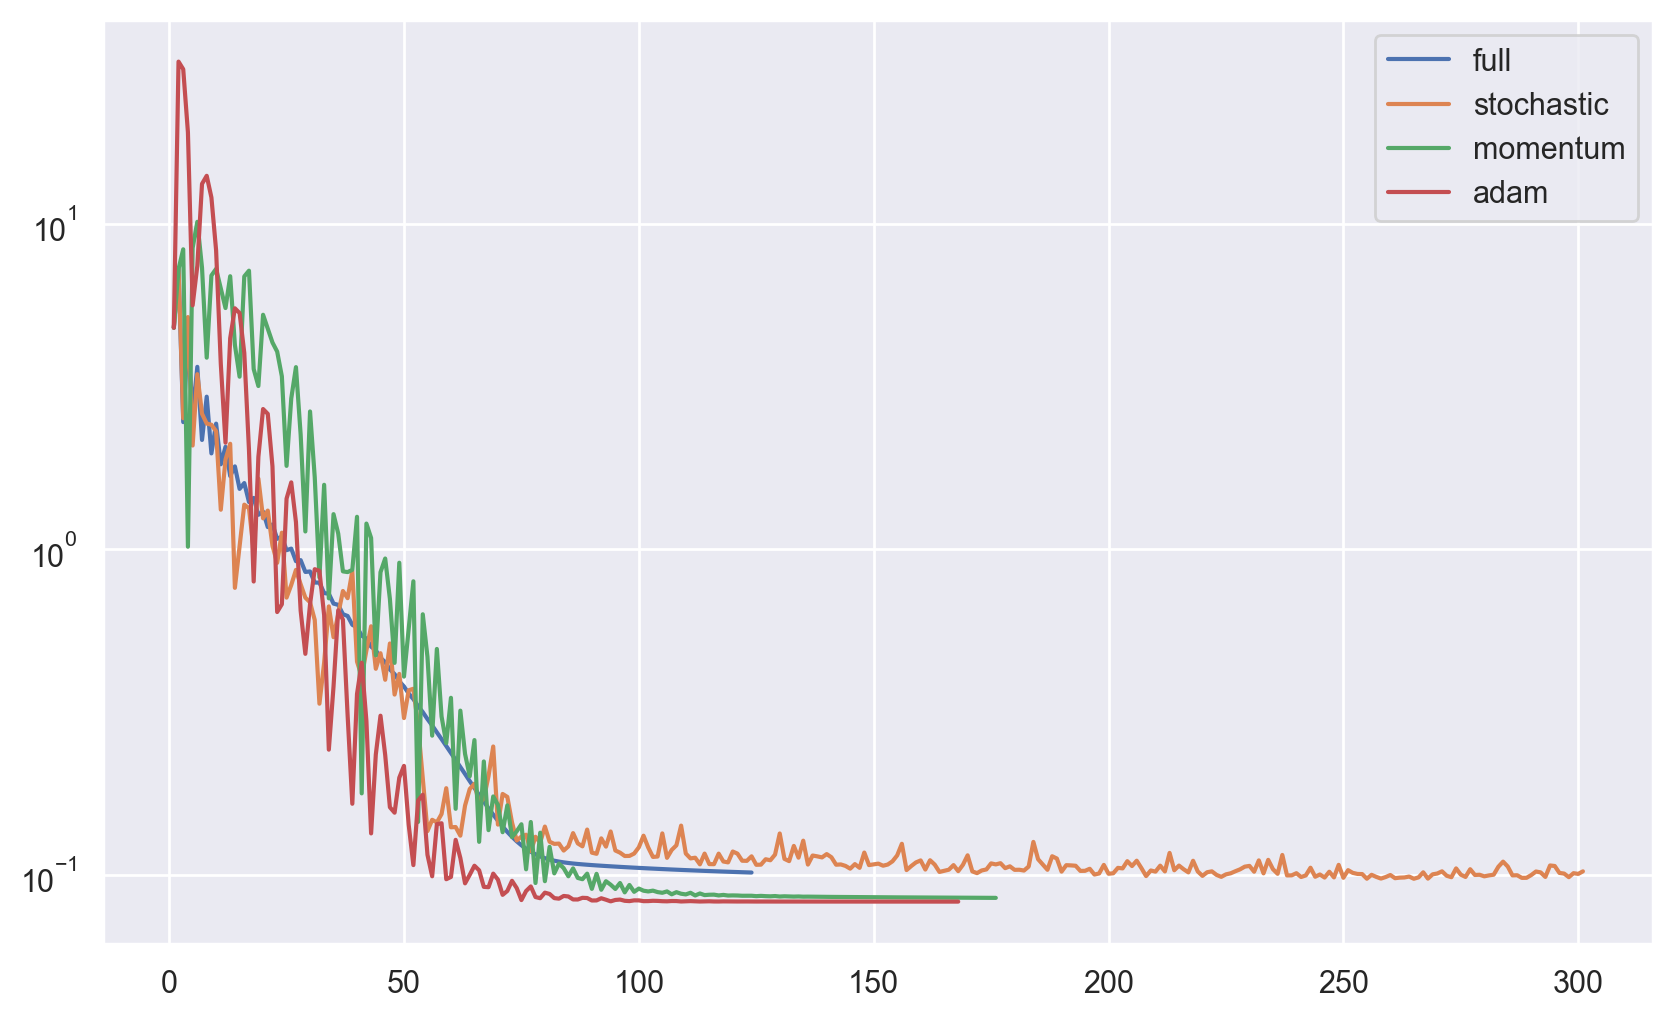

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    plot_data = benchmark_logcosh_descents[benchmark_logcosh_descents['descent_name'] == descent_name]
    train_losses = eval(plot_data['train_loss_history'].iloc[0])
    iterations = np.arange(1, len(train_losses) + 1)
    ax.plot(iterations, train_losses, label=descent_name)
ax.set_yscale('log')
ax.legend()
plt.show()

In [84]:
benchmark_logcosh_descents

,descent_name,lambda,num_iterations,train_loss,test_loss,r2_test,train_loss_history
0,full,10.0,123,0.101801,0.102765,0.795430,"[4.795049021577105, 7.261362694282434, 2.46028..."
1,stochastic,10.0,300,0.102666,0.103026,0.797761,"[4.795049021577105, 7.296470955668502, 2.52761..."
2,momentum,10.0,175,0.085106,0.086329,0.829118,"[4.795049021577105, 7.261362694282434, 8.34898..."
3,adam,10.0,167,0.082883,0.084100,0.833809,"[4.795049021577105, 31.479617371146656, 29.826..."


In [85]:
benchmark_mse_descents

,descent_name,lambda,num_iterations,train_loss,test_loss,r2_test,train_loss_history
0,full,2.154435,66,0.258133,0.261182,0.784944,"[33.514226878928646, 736.1481795299524, 10334...."
1,stochastic,0.464159,210,0.311055,0.315289,0.740392,"[33.514226878928646, 2.871310315646096, 0.9303..."
2,momentum,2.154435,150,0.209123,0.213097,0.824537,"[33.514226878928646, 736.1481795299524, 5224.1..."
3,adam,2.154435,142,0.197083,0.201461,0.834117,"[33.514226878928646, 12.567212332372112, 22.92..."
